In [1]:
from scipy.optimize import root_scalar, root
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from decimal import Decimal
from math import isclose
cm = 1/2.54  
width = 12*cm 

In [173]:
# physical functions


def AOK(k,Gam,sgam):
    return Gam*(Gam+sgam-k)

def minF(w,k,G,gamma):
    if k>0:
        if k>G+gamma:
            if w!=0:
                return (2*w-np.sqrt(w**2-3/2*AOK(k,G,gamma)))/3/k
            else:
                return -np.sqrt(-G/2*(G+gamma-k)/k**2)*0.9
        else:
            return 0
               
    else:
        return -w*G/2/(G/2*(G+gamma)+w**2)+1/10**3
def maxF(w,k,G,gamma):
    if k>0:
        return (2*w+np.sqrt(w**2-3/2*AOK(k,G,gamma)))/3/k
    else:
        if w==0:
            return 0#(2-np.sqrt(1-3/2*10**8*AOK(k,G,gamma)))/3
        else:
            return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3*w*10**5

# def lamtest(y,w,k,Gam,sgam):
#     A = AOK(k,Gam,sgam)
#     p = Gam**2/w**2+A/w**2/2+3*y**2-4*y+1
#     q = Gam**2/w**2*(A/w**2/2+3*y**2-4*y+1)+Gam**2/k**2*(2*y-k/w)*(y-k/w)
#     return p, p**2-4*q
    # return (-p+np.sqrt(p**2-4*q))/2, p,p**2-4*q

def lamtest(y,w,k,Gam,sgam):
    A = AOK(k,Gam,sgam)
    p = Gam**2+A/2+k**2*y**2-y*w*k
    q = Gam**2*(A/2+k**2*y**2-y*w*k)+Gam**2*(2*y*k-w)*(y*k-w)
    return p, p**2-4*q, q


def BK(W,K):
    return K/2/W**2

def yKnax(W,K):
    return (2+np.sqrt(1-3/2*(1-K)/W**2))/3
def yKnix(W,K):
    return (2-np.sqrt(1-3/2*(1-K)/W**2))/3
def FKK(W,K):
    return -BK(W,K)+yKnax(W,K)**3*2-2*yKnax(W,K)**2

def Foriginal_vec(p,w,k,delta,Gamma,gamma):
    x=p[0]
    y= p[1]
    eqx = -Gamma*delta*y-AOK(k,Gamma,gamma)*x-2*k**2*x*(x**2+y**2)+2*w*k*x*y
    eqy = Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y
    return np.array([eqx,eqy])
def Foriginal(y,w,k,Gamma,gamma):
    return -w*Gamma/2-Gamma/2*(Gamma+gamma-k)*y-k**2*y**3+2*w*k*y**2-w**2*y
# def y1ofx(x,w,k,delta,Gamma,gamma):
#     if x==0:
#         return 0
#     return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)))

def y1ofx(x,w,k,delta,Gamma,gamma):
    if x==0 and delta==0:
        return (2*w**2+np.sqrt(4*w**4+8*k*Gamma*w**2))/(4*k*w)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return 1/(Gamma*delta+2*k*w*x)*(w**2*x+np.sqrt(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)))

def num(x,w,k,delta,Gamma,gamma):
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return (w**2*x+(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)).sqrt())

def denom(x,w,k,delta,Gamma,gamma):
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return Gamma*delta+2*k*w*x

def insq(x,w,k,delta,Gamma,gamma):
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return (w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2))
    # return (k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)

def insq_preci(x,w,k,delta,Gamma,gamma):
    x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return (w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2))

def y2ofx(x,w,k,delta,Gamma,gamma):
    if x==0 and delta==0:
        return (2*w**2-np.sqrt(4*w**4+8*k*Gamma*w**2))/(4*k*w)
    # x,w, k, delta, Gamma , prec2 = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(2)
    prec2=2
    return 1/(Gamma*delta+prec2*k*w*x)*(w**prec2*x-np.sqrt(w**4*x**prec2-(prec2*k*w*x+Gamma*delta)*(prec2*k*w*x**3-w*Gamma*x+Gamma*delta*x**prec2)))
    # if x==0:
    #     return w/k
    # return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2-np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2*x)))
y1ofx_vec = np.vectorize(y1ofx)
y2ofx_vec = np.vectorize(y2ofx)
def Fx(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx(x,w,k,delta,Gamma,gamma)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y

def Fx2(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx(x,w,k,delta,Gamma,gamma)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return -Gamma*delta*y-AOK(k,Gamma,gamma)*x-2*k**2*x*(x**2+y**2)+2*k*w*x*y
def Fx_vec(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx_vec(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx_vec(x,w,k,delta,Gamma,gamma)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return Gamma*delta*x-w*Gamma-AOK(k,Gamma,gamma)*y-2*k**2*y*(x**2+y**2)+2*k*w*(x**2+2*y**2)-2*w**2*y

def Fx2_vec(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx_vec(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx_vec(x,w,k,delta,Gamma,gamma)
    # x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return -Gamma*delta*y-AOK(k,Gamma,gamma)*x-2*k**2*x*(x**2+y**2)+2*k*w*x*y

def eq(x,w,k,delta,Gamma,gamma,s):
    if s==1:
        y = y1ofx(x,w,k,delta,Gamma,gamma)
    if s==2:
        y = y2ofx(x,w,k,delta,Gamma,gamma)
    x,w, k, delta, Gamma , gamma = Decimal(x), Decimal(w), Decimal(k), Decimal(delta), Decimal(Gamma), Decimal(gamma)
    return -Gamma*delta*(y**2+x**2)+w*Gamma*x-2*k*w*x*(x**2+y**2)+2*w**2*x*y

def m_z(x,y,omega,kappa,Gamma):
    return 1/2 -(kappa*(y**2+x**2)-omega*y)/Gamma

def set_point1(p,w,k,delta,Gamma,gamma):
    n = 0
    while True:
        try:
            p+= n* 5/10**7
            if np.isnan(Fx(p,w,k,delta,Gamma,gamma,1)):
                n+=1
                continue
            else:
                n+=1
                # print(Fx(p,w,k,delta,Gamma,gamma,1))
                break
        except RuntimeWarning:
            n+=1
            pass
    return p

def set_point2(p,w,k,delta,Gamma,gamma):
    n = 0
    while True:
        try:
            p-= n* 5/10**7
            if np.isnan(Fx(p,w,k,delta,Gamma,gamma,1)):
                n+=1
                continue
            else:
                # print(Fx(p,w,k,delta,Gamma,gamma,1))
                n+=1
                break
        except RuntimeWarning:
            n+=1
            pass
    return p
            

def set_xgird(w,k,delta,Gamma,gamma,points=False):
    grid1 = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
    pos = 0
    p1= None
    p2 = None
    if max(insq(grid1,w,k,delta,Gamma,gamma))<0:# or min(insq(grid1,w,k,delta,Gamma,gamma))>0:
        # print('no solution')
        return np.array([-2]), None
    gridpoints = []
    newgrid = np.array([0])
    if insq(grid1[0],w,k,delta,Gamma,gamma)>=0:
        if insq(grid1[0]+1/10**5,w,k,delta,Gamma,gamma)>=0:
            p1 = set_point1(grid1[0],w,k,delta,Gamma,gamma)
            gridpoints.append(p1)
    for i in range(len(grid1)-1):
        f1 = insq(grid1[i],w,k,delta,Gamma,gamma)
        f2 = insq(grid1[i+1],w,k,delta,Gamma,gamma)
        if f1*f2<=0:
            r = root_scalar(insq,args=(w,k,delta,Gamma,gamma),method='bisect',bracket=(grid1[i],grid1[i+1]))
            # print(r.root)
            if p1!=None:
                p2 = set_point2(r.root,w,k,delta,Gamma,gamma)
                newgrid = np.concatenate((newgrid,np.linspace(p1,p2,30)))
                # print(np.linspace(p1,p2,30))
                gridpoints.append(p2)
                p1=None
            else:
                p1 = set_point1(r.root,w,k,delta,Gamma,gamma)
                gridpoints.append(p1)
    if p1!=None:
        p2 = set_point2(grid1[-1],w,k,delta,Gamma,gamma)
        newgrid = np.concatenate((newgrid,np.linspace(p1,p2,30)))
        gridpoints.append(p2)
    
    # print(len(gridpoints),gridpoints)
    if len(gridpoints)==2:
        # print(gridpoints[0],grid1[0])
        if gridpoints[0]==grid1[0]:
            # print(gridpoints[-1],grid1[-1])
            if gridpoints[-1]==grid1[-1]:
                if points:
                    return np.linspace(-0.5,0.5,80), np.array(gridpoints)
                return np.linspace(-0.5,0.5,80)
    if points==True:
        return newgrid[1:], np.array(gridpoints)
    return newgrid[1:]

def maxx(w,k,d,Gamma):
    return (Gamma*d)**2/(Gamma*d*w**2-k*w**2*Gamma)

from sympy.abc import gamma, G, kappa, omega, delta, x, y, z, t
from sympy.matrices import Matrix
from sympy import lambdify, simplify, expand
import numpy as np
m = Matrix([x,y,z])
glx = -delta/2*m[1]-(gamma+G)/2*m[0]+kappa*m[0]*m[2]
gly = delta/2*m[0]-omega*m[2]-(gamma+G)/2*m[1]+kappa*m[1]*m[2]
glz = omega*m[1]-kappa*(m[0]**2+m[1]**2)+G/2-G*m[2]
gl = Matrix([glx,gly,glz])
jac_gl = gl.jacobian([m[0],m[1],m[2]])
gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],gl)
jac_gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],jac_gl)
# gl_np(0,[0,2,1],1,1/2,0.2,1), jac_gl_np(0,[0,2,1],1,1/2,0.2,1)
from scipy.integrate import solve_ivp
mz= 1/2 - 1/G*(kappa*(m[0]**2+m[1]**2)-omega*m[1])
jac_gl = simplify(expand(jac_gl.subs(z,mz)))
jac_gl

def check_spec(w,k,delta,Gamma,gamma):
    if k==0:
        return -1
    return Gamma*delta*np.sqrt(-AOK(k,Gamma,gamma)/2/k**2)-w*Gamma-w/k*AOK(k,Gamma,gamma)


In [3]:
#Plotting Class



class TickProperties():
    
    major_xtick_step = 5,
    minor_xtick_step = 1
    major_ytick_step = 5
    minor_ytick_step = 1
    STRIP_OF_ZEROS_X = False
    STRIP_OF_ZEROS_Y = False

    def __init__(self,\
    xtick_step_major = 5,\
    xtick_step_minor = 1,\
    ytick_step_major = 5,\
    ytick_step_minor = 1,\
    SZX = False,\
    SZY = False):
        self.major_xtick_step = xtick_step_major
        self.minor_xtick_step = xtick_step_minor
        self.major_ytick_step = ytick_step_major
        self.minor_ytick_step = ytick_step_minor
        self.STRIP_OF_ZEROS_X = SZX
        self.STRIP_OF_ZEROS_Y = SZY

class Format():
    numb_xticks = None
    numb_yticks = None
    custom_func_x = None
    custom_func_y = None
    x_scale = None
    y_scale = None
    x_precion = "{:.2f}"
    y_precion = "{:.2f}"
    def __init__(self,numb_xticks=None,numb_yticks=None,custom_funx=None,custom_funy=None,xscale=None,yscale=None,xprec="{:.2f}",yprec="{:.2f}"):
        self.numb_xticks =numb_xticks
        self.numb_yticks = numb_yticks
        self.custom_func_x = custom_funx
        self.custom_func_y = custom_funy
        self.x_precion=xprec
        self.y_precion = yprec
        self.x_scale = xscale
        self.y_scale = yscale
    def formatx0(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    def formatx1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return self.x_precion.format(self.x_scale[index])
        except:
            return self.x_precion.format(self.x_scale[-1])
    
    def formaty1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.y_scale.shape[0]//self.numb_yticks)
            # print(index)
            # print()
            return self.y_precion.format(self.y_scale[index])
        except:
            return self.y_precion.format(self.y_scale[-1])
        
    def formaty(self,x,pos):
        try:
            return self.y_precion.format(self.y_scale[int(x)])
        except:
            return ""

class Setup_Fig():
    DEFAULT_HEAT_EXTEND = (-0.5,39.5,29.5,-0.5)
    xlim = None
    ylim = None
    tickprop = TickProperties()
    formatter = Format()
    cm = 1/2.54 
    fig_width = 12*cm
    fig_height = 4.8/6.4*12*cm
    name_of_plot = None
    def __init__(self,name_of_plot = "sign_of_ev1.pdf",xlim=None,ylim=None,tickp=TickProperties(),formater=Format()):
        self.xlim=xlim
        self.ylim = ylim   
        self.tickprop =tickp       
        self.formatter = formater
        self.name_of_plot = name_of_plot

    
    plt.rcParams["lines.markersize"]=0.7
    plt.rcParams["axes.unicode_minus"]=True
    plt.rcParams["font.size"]=10
    plt.rcParams["text.usetex"]=True
    plt.rcParams["font.serif"]="Computer Modern Serif"
# ax.scatter(A,root,color='0')
    



    def return_fig(self,shape=(1,1),dots_per_inch=400,xax_share=False,yax_share=False,joined=False):
        
        fig, ax = plt.subplots(*shape,figsize=(self.fig_width,self.fig_height),dpi=dots_per_inch,sharex=xax_share,sharey=yax_share)
        trash, xw, yw, trash=self.DEFAULT_HEAT_EXTEND# im.get_extent()
        self.formatter.numb_xticks = xw//self.tickprop.major_xtick_step+1
        self.formatter.numb_yticks = yw//self.tickprop.major_ytick_step+1
        
        for i in range(shape[0]):
            for j in range(shape[1]):
                pos= 'outer_left'
                if shape[0]==1:
                    if shape[1]==1:
                        current_ax = ax
                    else:
                        current_ax = ax[j]
                else:
                    if shape[1]==1:
                        current_ax = ax[i]
                    else:
                        current_ax = ax[i,j]
                        if j==0:
                           pos= 'outer_left'
                        elif j<shape[1]-1:
                            pos = 'middle'
                        elif j==shape[1]-1:
                            pos = 'outer_right'
                        


        # axlimits have to be adapted
                try:
                    current_ax.set_xlim(*self.xlim)
                except:
                    pass
                try:
                    current_ax.set_ylim(*self.ylim)
                except:
                    pass    
            

                if self.tickprop.STRIP_OF_ZEROS_X:
                    current_ax.xaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formatx0))
                current_ax.yaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_ytick_step))
                current_ax.yaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_ytick_step))
                current_ax.xaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_xtick_step))
                current_ax.xaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_xtick_step))

                if self.tickprop.STRIP_OF_ZEROS_Y:
                    current_ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formaty1))  

                if joined:
                    if i<shape[0]-1:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=False)
                    else:
                        current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                        
                    if pos=='outer_left':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
                    elif pos=='middle':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=False)
                    elif pos=='outer_right':
                        current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelright=True)
                        # current_ax.set_xlabel(r'$\Gamma \tilde{A}$')
                        # current_ax.set_ylabel(r'$\tilde{y}$',rotation=0)
                else:
                    current_ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
                    
                    current_ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)   


                current_ax.tick_params(axis='both',which='major',length=4.5)
                plt.setp(current_ax.yaxis.get_majorticklabels(),va='center')
        
        return fig, ax





1.0 1.0 -5.0


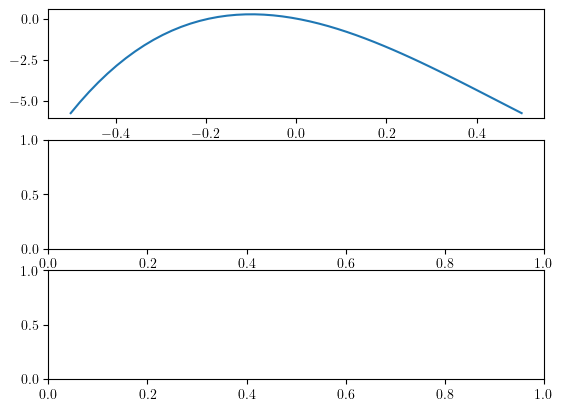

1.0 1.0 -1.6666666666666665


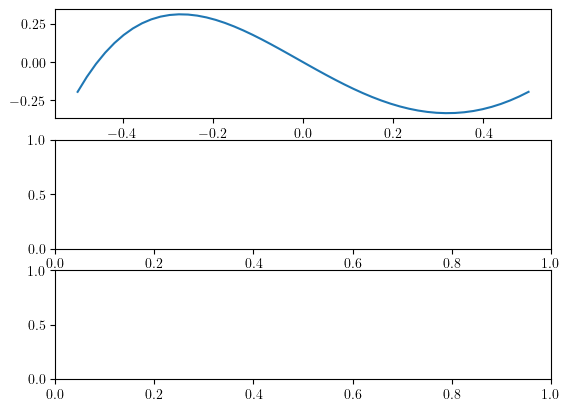

1.0 1.0 1.666666666666667


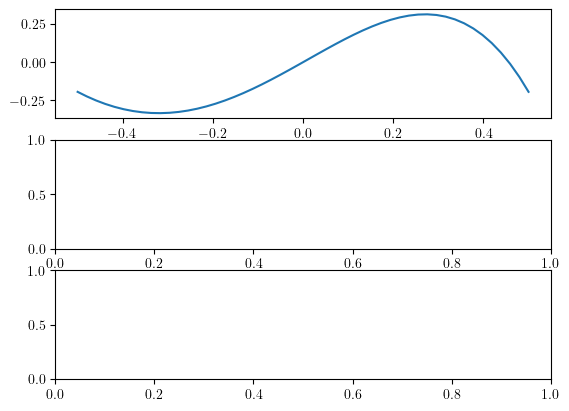

1.0 1.0 5.0


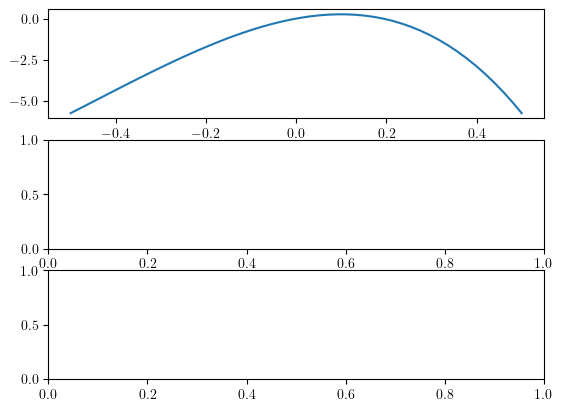

1.0 2.666666666666667 -5.0


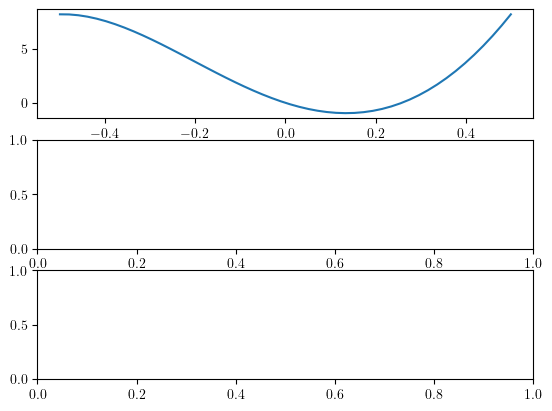

1.0 2.666666666666667 -1.6666666666666665


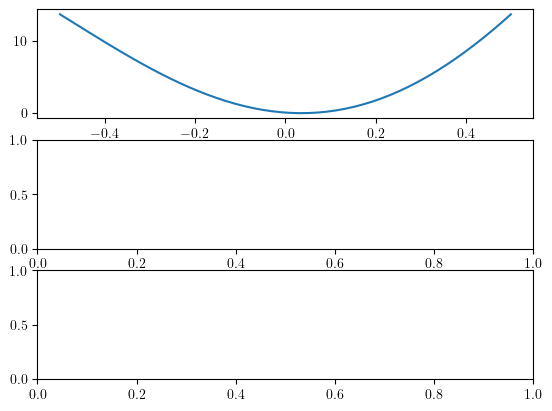

1.0 2.666666666666667 1.666666666666667


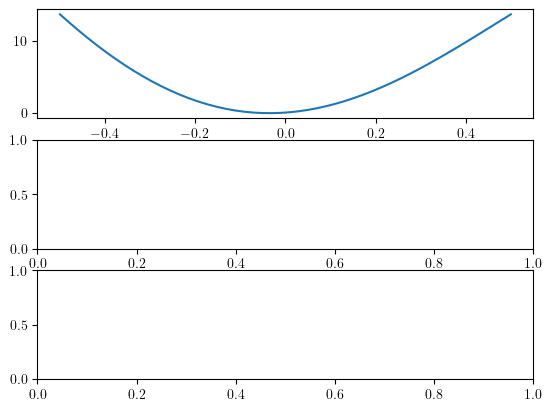

1.0 2.666666666666667 5.0


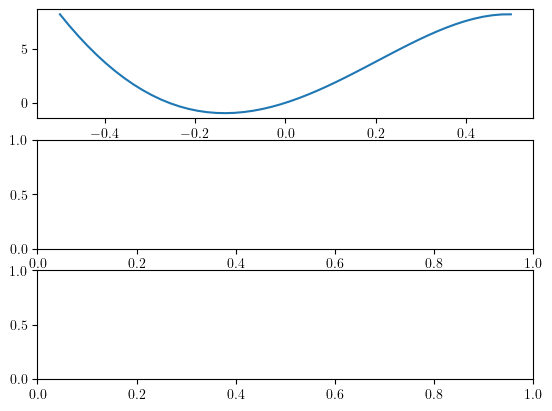

1.0 4.333333333333334 -5.0


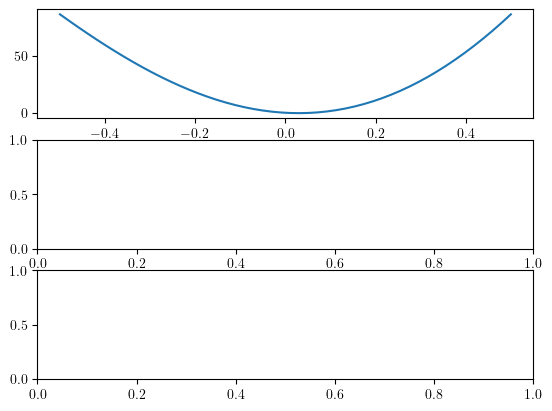

1.0 4.333333333333334 -1.6666666666666665


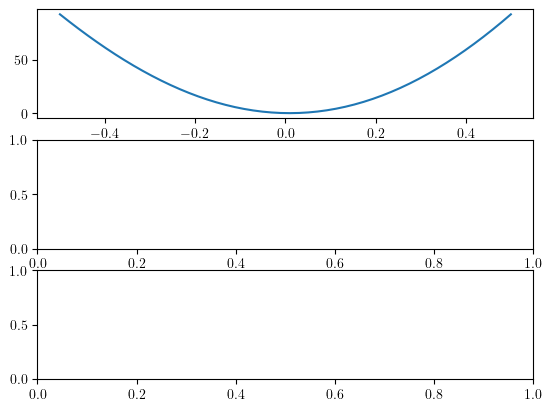

1.0 4.333333333333334 1.666666666666667


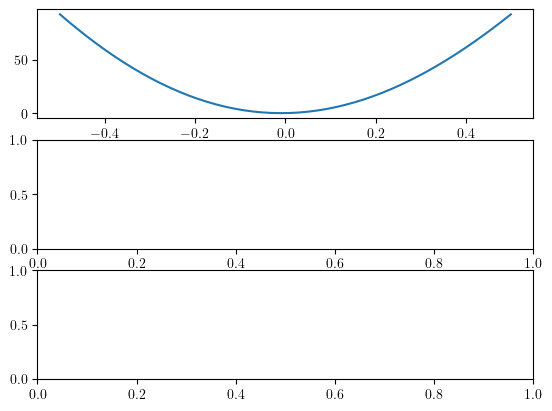

1.0 4.333333333333334 5.0


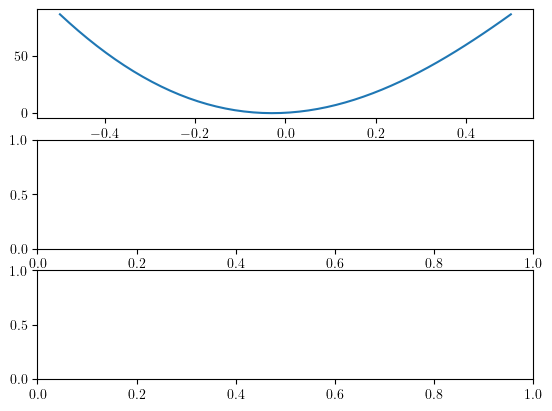

1.0 6.0 -5.0


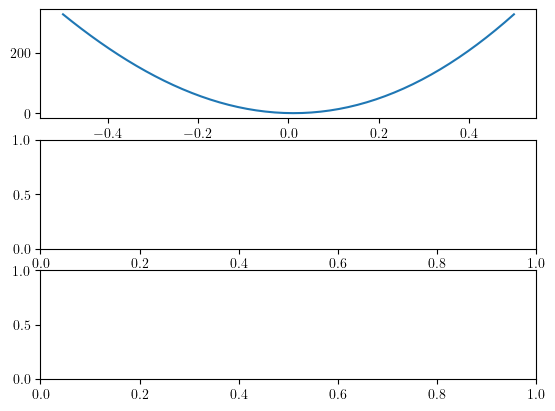

1.0 6.0 -1.6666666666666665


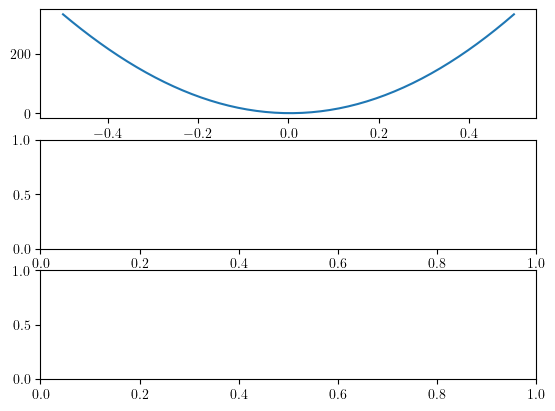

1.0 6.0 1.666666666666667


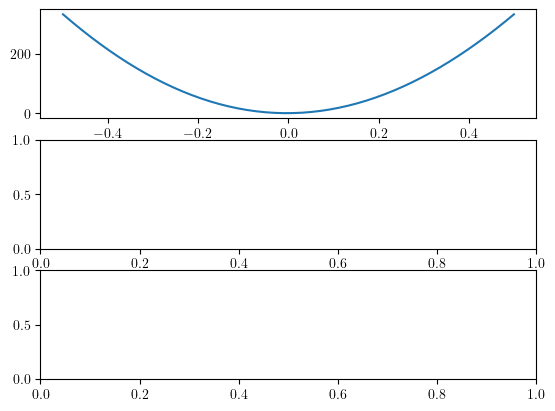

1.0 6.0 5.0


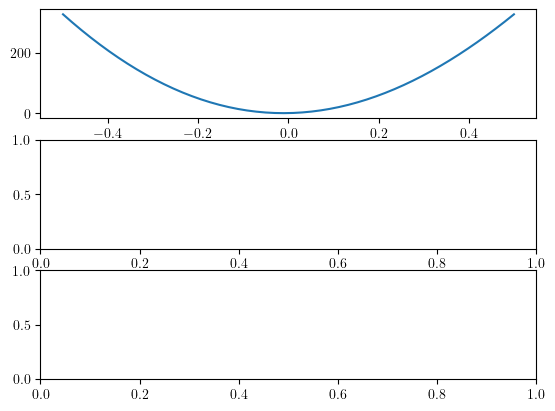

4.0 1.0 -5.0


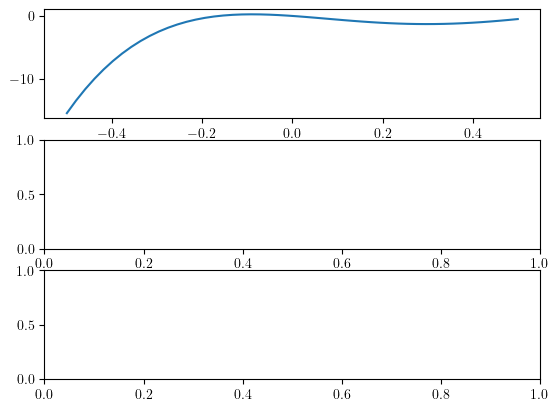

4.0 1.0 -1.6666666666666665


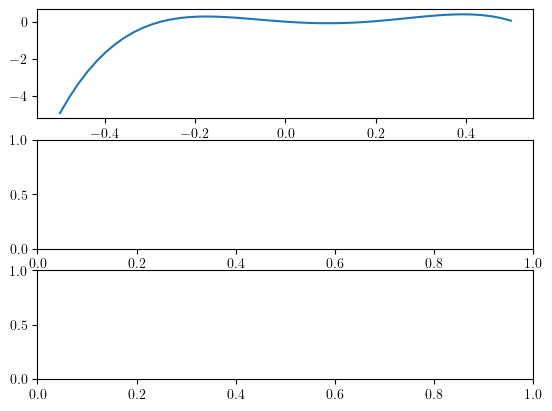

4.0 1.0 1.666666666666667


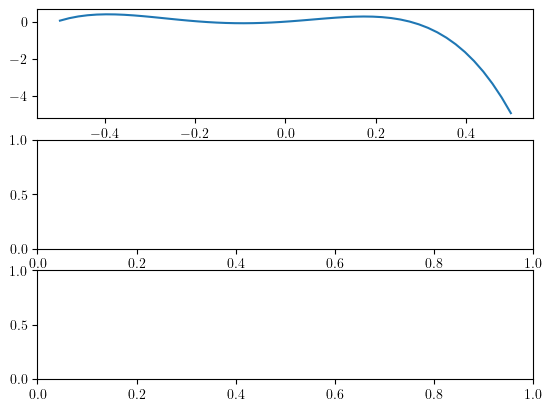

4.0 1.0 5.0


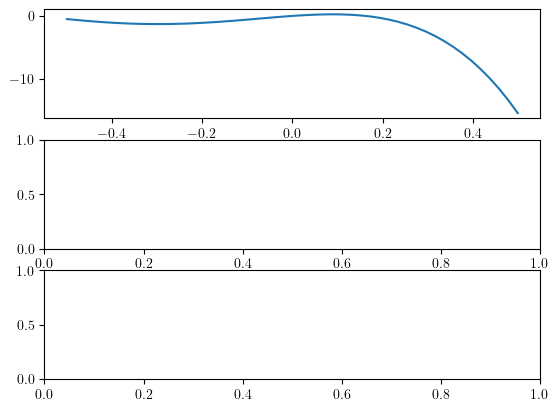

4.0 2.666666666666667 -5.0


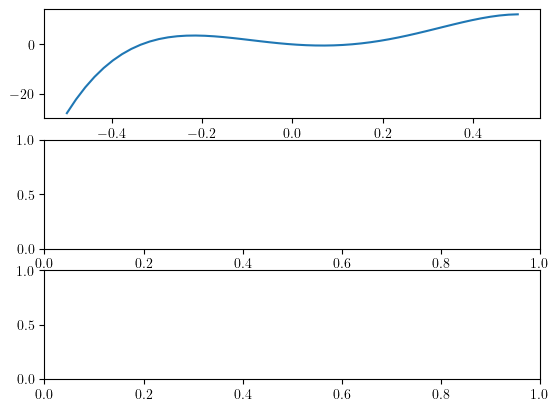

4.0 2.666666666666667 -1.6666666666666665


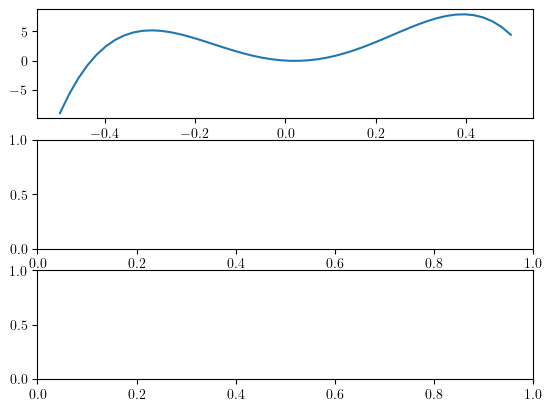

4.0 2.666666666666667 1.666666666666667


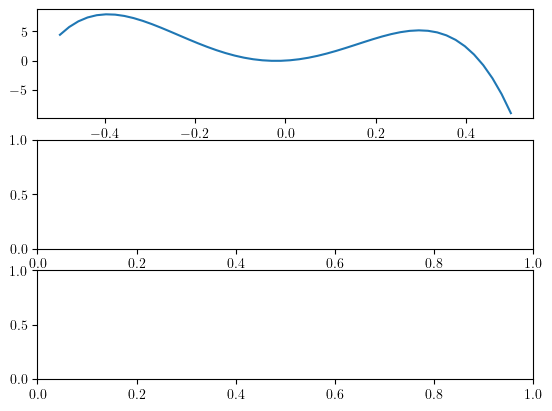

4.0 2.666666666666667 5.0


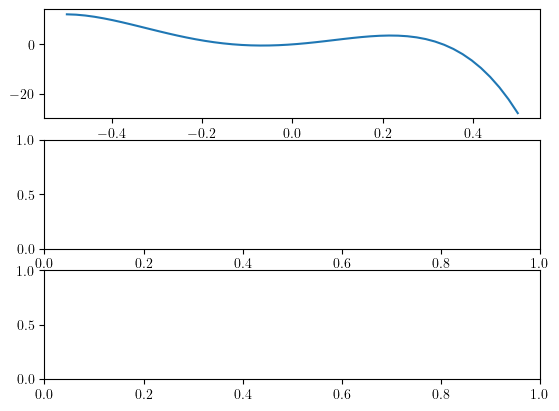

4.0 4.333333333333334 -5.0


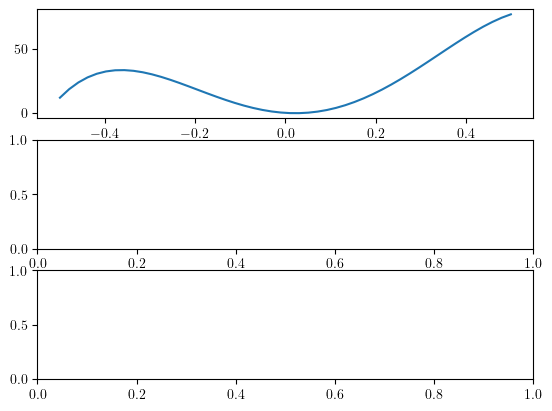

4.0 4.333333333333334 -1.6666666666666665


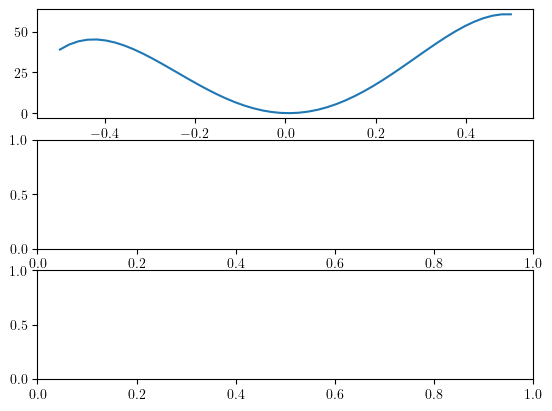

4.0 4.333333333333334 1.666666666666667


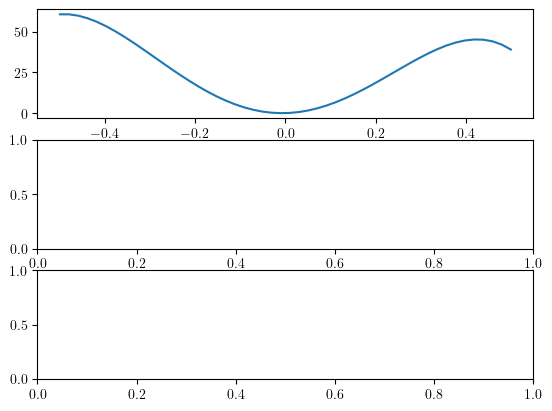

4.0 4.333333333333334 5.0


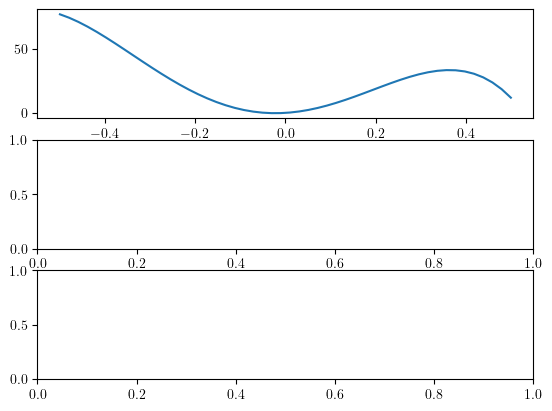

4.0 6.0 -5.0


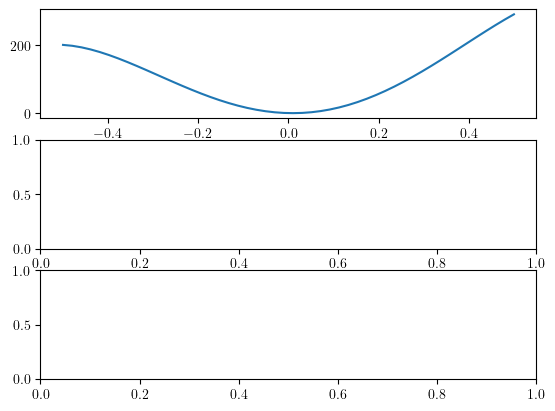

4.0 6.0 -1.6666666666666665


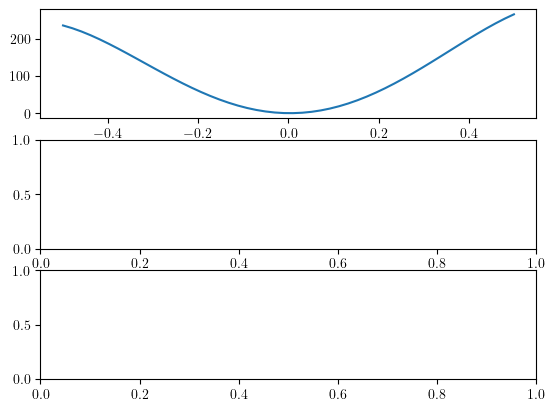

4.0 6.0 1.666666666666667


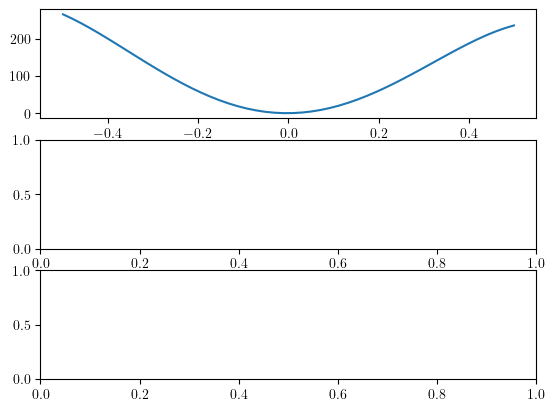

4.0 6.0 5.0


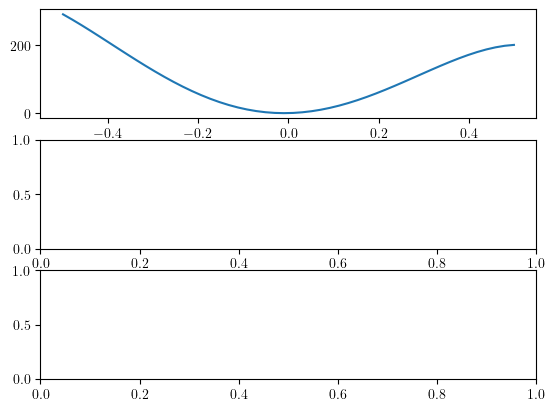

7.0 1.0 -5.0


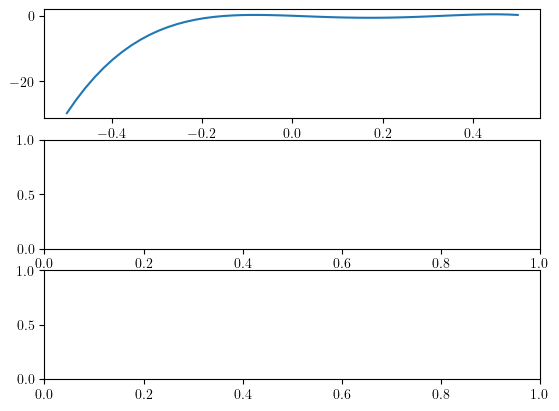

7.0 1.0 -1.6666666666666665


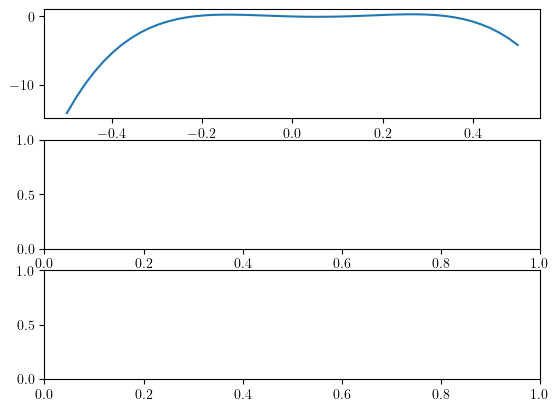

7.0 1.0 1.666666666666667


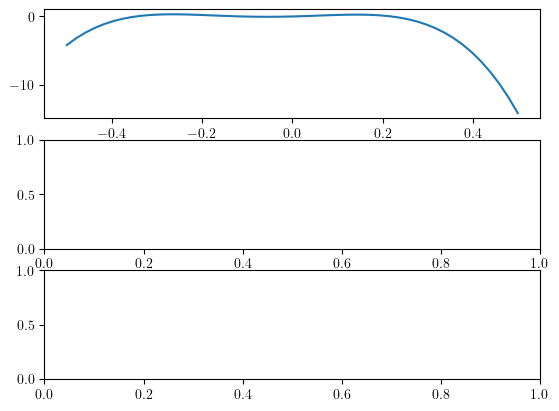

7.0 1.0 5.0


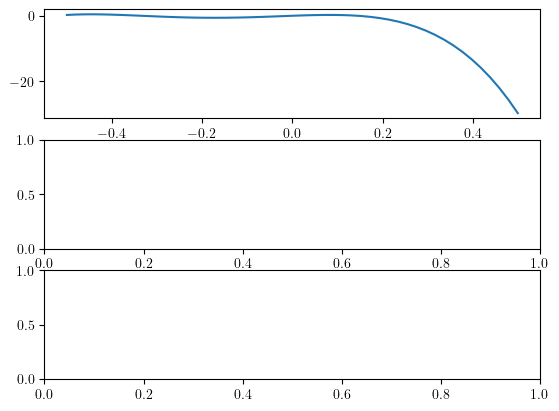

7.0 2.666666666666667 -5.0


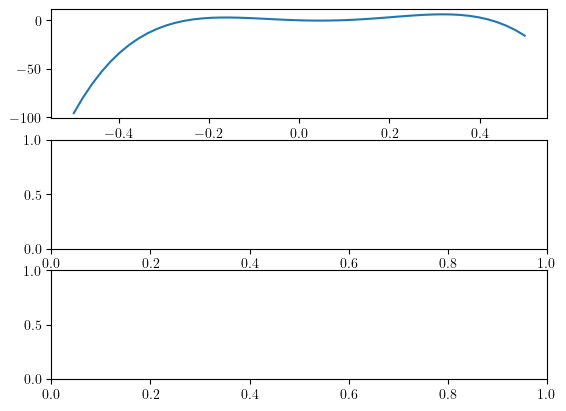

7.0 2.666666666666667 -1.6666666666666665


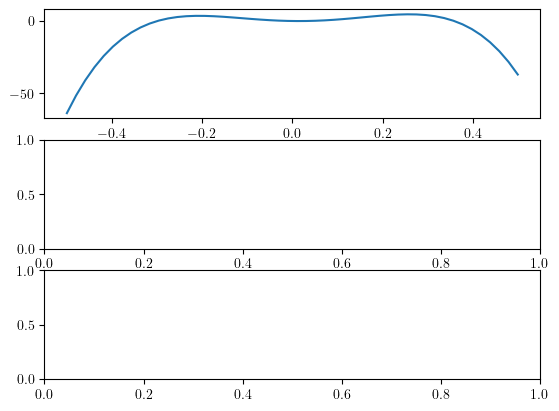

7.0 2.666666666666667 1.666666666666667


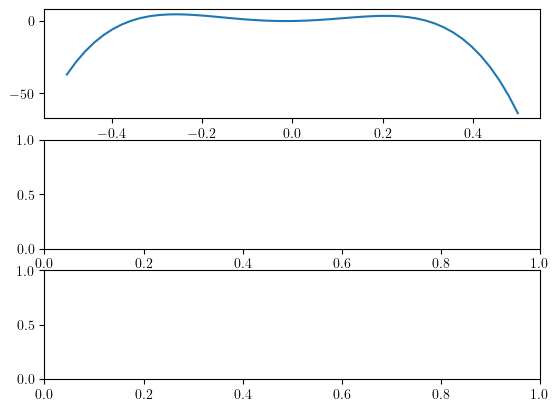

7.0 2.666666666666667 5.0


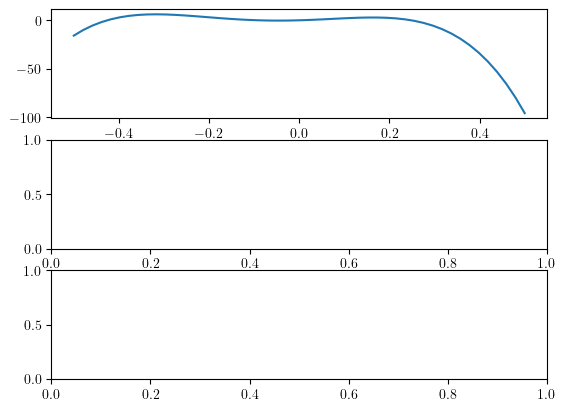

7.0 4.333333333333334 -5.0


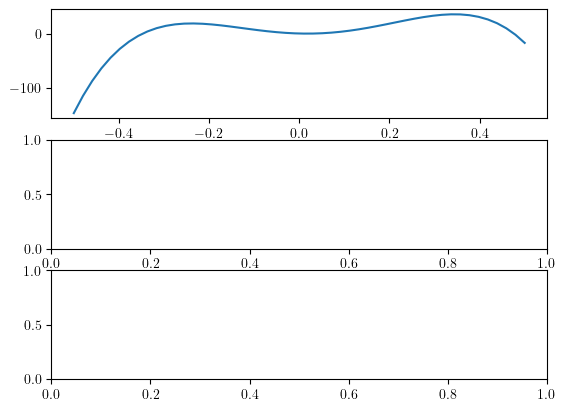

7.0 4.333333333333334 -1.6666666666666665


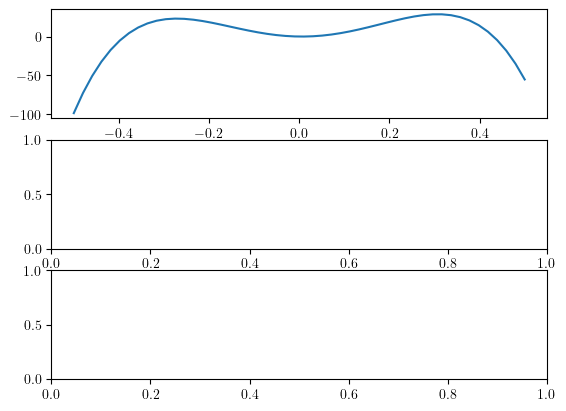

7.0 4.333333333333334 1.666666666666667


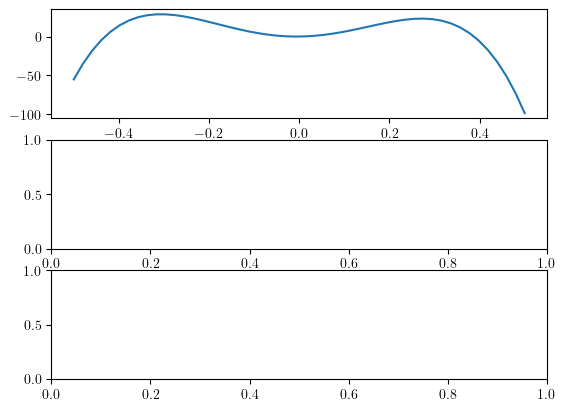

7.0 4.333333333333334 5.0


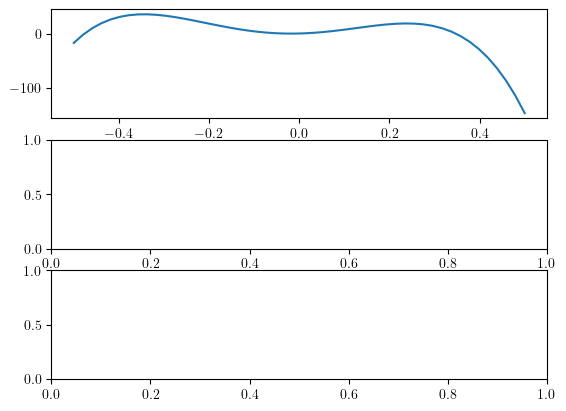

7.0 6.0 -5.0


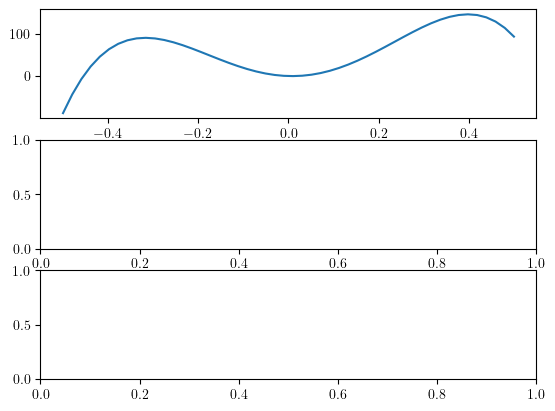

7.0 6.0 -1.6666666666666665


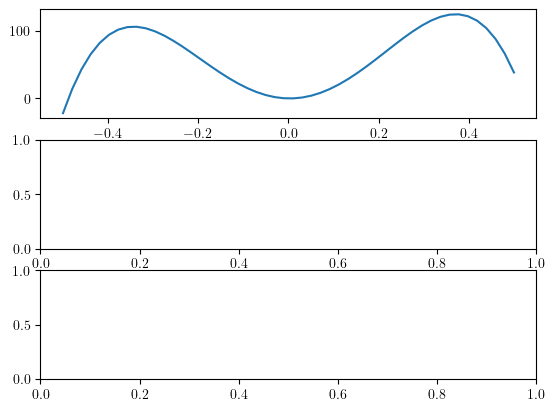

7.0 6.0 1.666666666666667


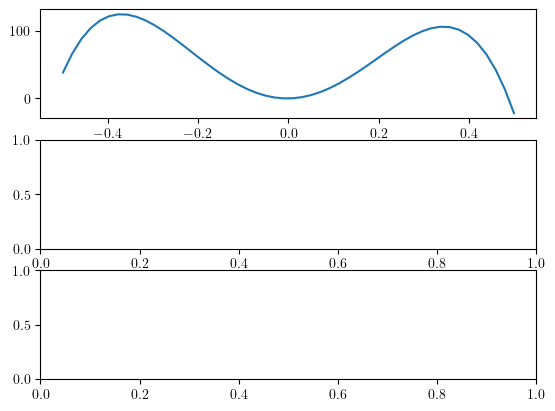

7.0 6.0 5.0


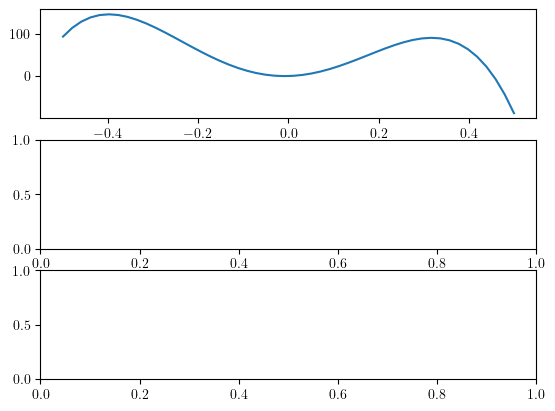

10.0 1.0 -5.0


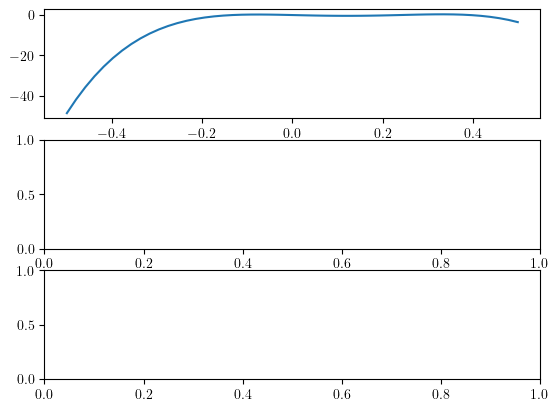

10.0 1.0 -1.6666666666666665


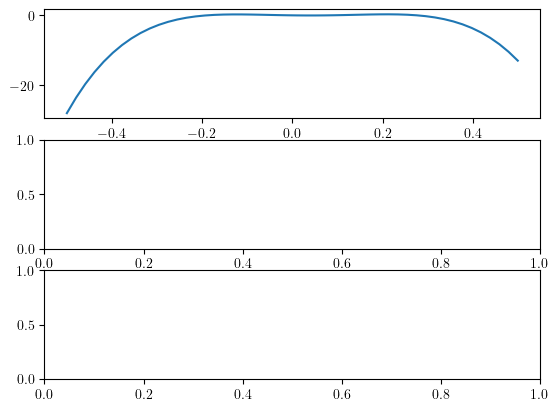

10.0 1.0 1.666666666666667


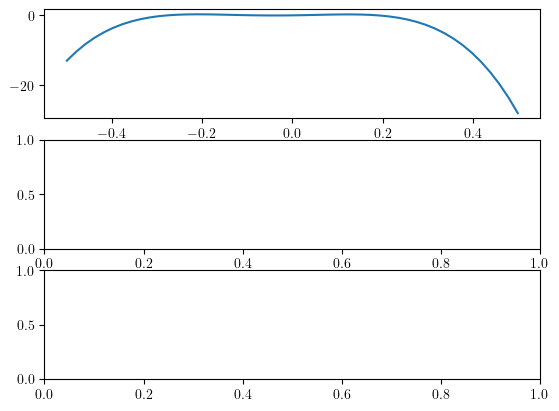

10.0 1.0 5.0


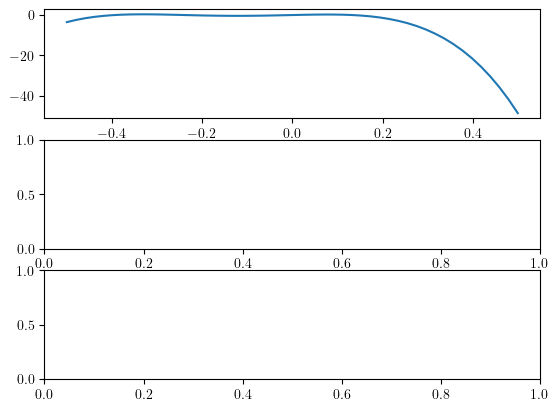

10.0 2.666666666666667 -5.0


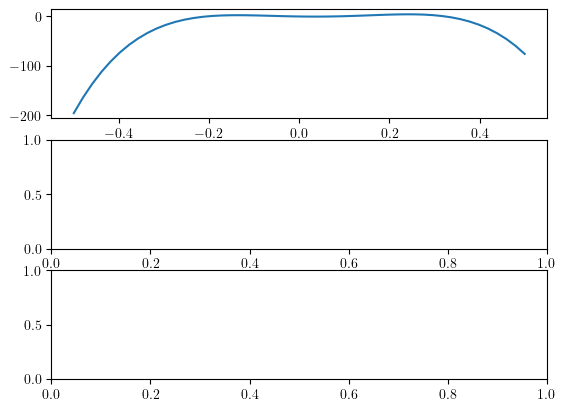

10.0 2.666666666666667 -1.6666666666666665


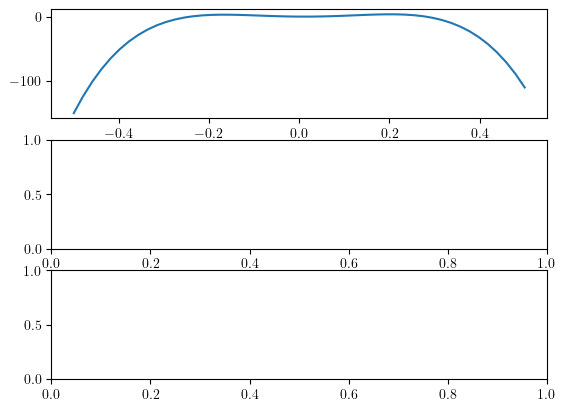

10.0 2.666666666666667 1.666666666666667


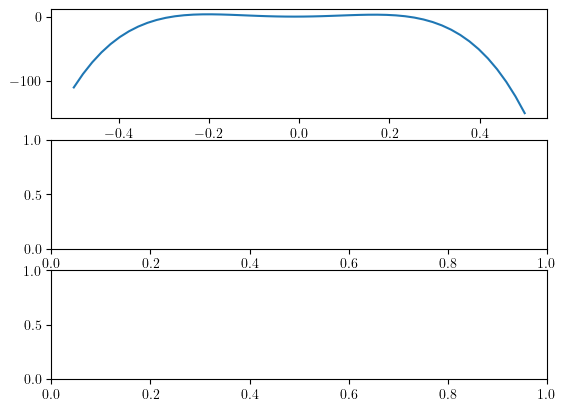

10.0 2.666666666666667 5.0


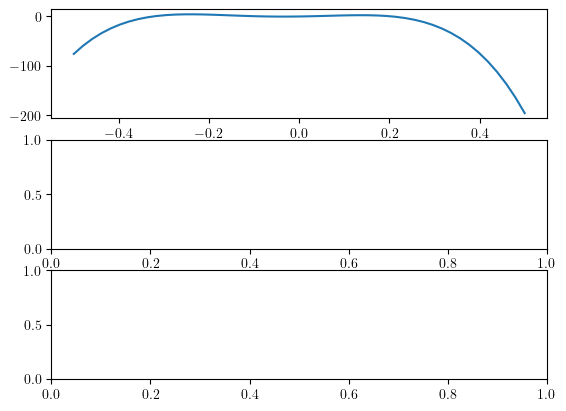

10.0 4.333333333333334 -5.0


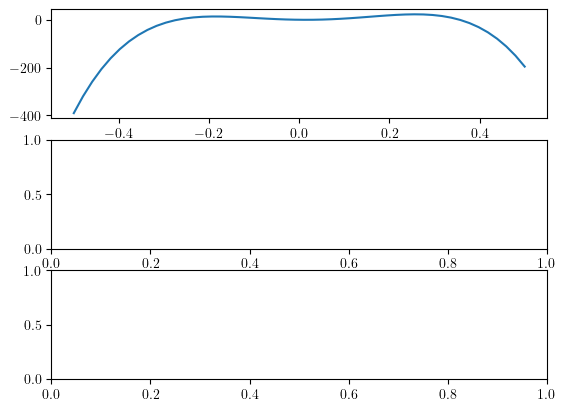

10.0 4.333333333333334 -1.6666666666666665


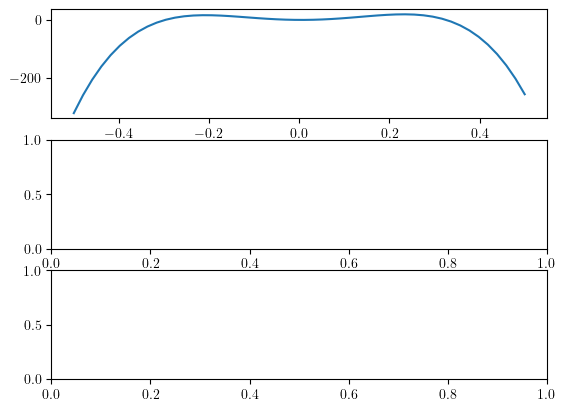

10.0 4.333333333333334 1.666666666666667


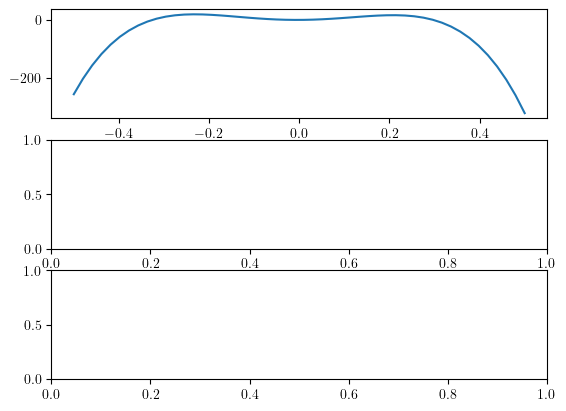

10.0 4.333333333333334 5.0


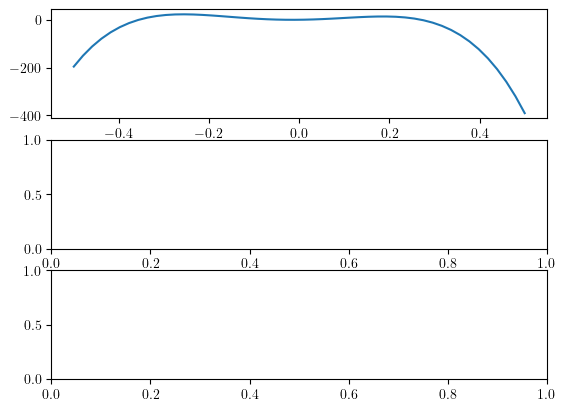

10.0 6.0 -5.0


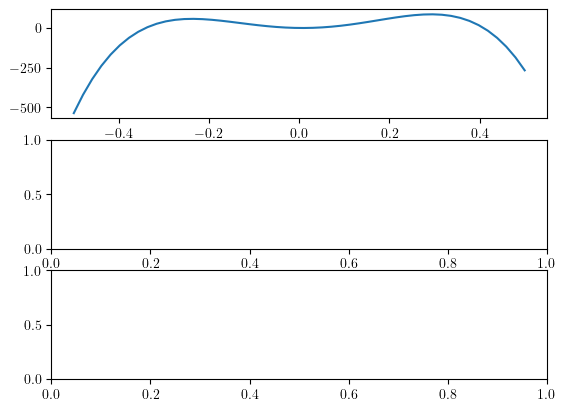

10.0 6.0 -1.6666666666666665


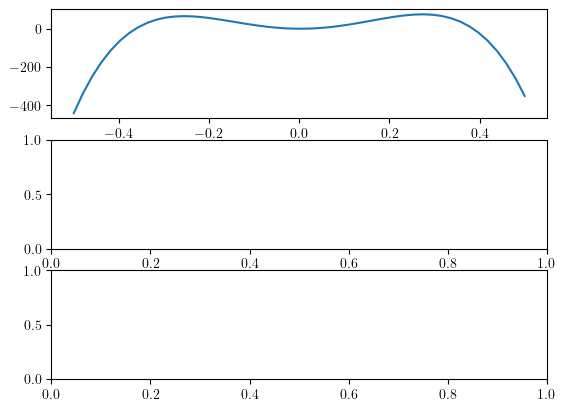

10.0 6.0 1.666666666666667


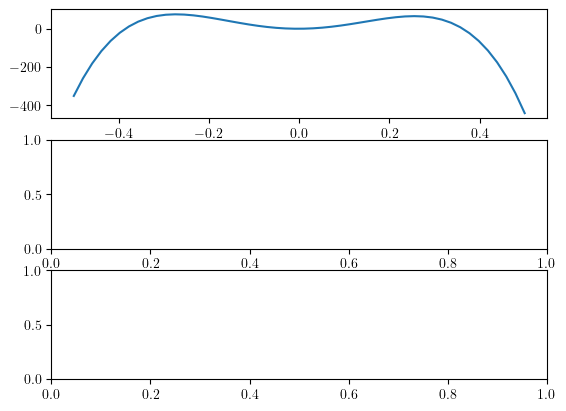

10.0 6.0 5.0


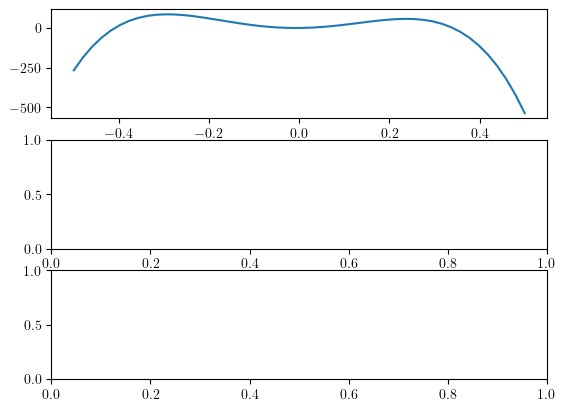

In [75]:
Gam = 1
sgam = 0.2
s =1
gridpoints = 4
k= np.linspace(1,10,gridpoints)
w = np.linspace(1,6,gridpoints)
d = np.linspace(-5,5,gridpoints)
x_range =np.linspace(-0.5,0.5)
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            print(kval,wval,dval)
            fig, ax = plt.subplots(3,1)
            func = np.zeros_like(x_range)
            # for i,x in enumerate(x_range):
                # func[i]= y2ofx(x,wval,kval,dval,Gam,sgam)
            # plt.plot(x_range,num(x_range,wval,kval,dval,Gam,sgam))
            # plt.plot(x_range,denom(x_range,wval,kval,dval,Gam,sgam))
            # print(func)
            ax[0].plot(x_range,insq(x_range,wval,kval,dval,Gam,sgam))
            # ax[1].plot(x_range,func)
            # ax[2].plot(x_range,x_range**2+func**2)
            # plt.scatter(maxx(wval,kval,dval,Gam),0,s=20,color='0')
            plt.show()

In [4]:
Gam = 1
sgam = 0.2
s =1
k= np.linspace(1/10**5,10,30)
w = np.linspace(0,6,30)
d = np.linspace(-5,5,30)
xsol = np.ones((30,30,30,10))
# xgrid = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
solution_number = np.zeros((30,30,30))
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            sol_numb = 0
            xgrid = set_xgird(wval,kval,dval,Gam,sgam)
            # print(xgrid)
            if xgrid[0]==-2:
                continue
            for j in range(len(xgrid)-1):
                
                Fl = Fx(xgrid[j],wval,kval,dval,Gam,sgam,s)
                Fu = Fx(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                if Fl*Fu<=0:
                    r = root_scalar(Fx,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                    xsol[ik,iw,id,sol_numb] = r.root
                    sol_numb+=1
            solution_number[ik,iw,id]=sol_numb
            if sol_numb==0:
                print(kval,wval,dval)
                
                # print(xgrid)






1e-05 0.0 0.1724137931034484
1e-05 0.0 0.5172413793103452
1e-05 0.0 0.862068965517242
1e-05 0.0 1.2068965517241388
1e-05 0.0 1.5517241379310347
1e-05 0.20689655172413793 0.1724137931034484
1e-05 0.20689655172413793 0.5172413793103452
1e-05 0.20689655172413793 0.862068965517242
1e-05 0.20689655172413793 1.2068965517241388
1e-05 0.20689655172413793 1.5517241379310347
1e-05 0.41379310344827586 0.1724137931034484
1e-05 0.41379310344827586 0.5172413793103452
1e-05 0.41379310344827586 0.862068965517242
1e-05 0.41379310344827586 1.2068965517241388
1e-05 0.41379310344827586 1.5517241379310347
1e-05 0.6206896551724138 0.1724137931034484
1e-05 0.6206896551724138 0.5172413793103452
1e-05 0.6206896551724138 0.862068965517242
1e-05 0.6206896551724138 1.2068965517241388
1e-05 0.6206896551724138 1.5517241379310347
1e-05 0.8275862068965517 0.1724137931034484
1e-05 0.8275862068965517 0.5172413793103452
1e-05 0.8275862068965517 0.862068965517242
1e-05 0.8275862068965517 1.2068965517241388
1e-05 0.827586

/tmp/ipykernel_13482/722408274.py:60: RuntimeWarning: invalid value encountered in sqrt
  return 1/(2*k**2*x)*(k*w*x-Gamma*delta/2+np.sqrt((k*w*x-Gamma*delta/2)**2-4*x*k**2*(k**2*x**3+AOK(k,Gamma,gamma)/2)))


3.4482824137931036 4.9655172413793105 4.655172413793103
3.4482824137931036 4.9655172413793105 5.0
3.4482824137931036 5.172413793103448 -2.2413793103448274
3.4482824137931036 5.172413793103448 -1.8965517241379306
3.4482824137931036 5.172413793103448 -1.5517241379310343
3.4482824137931036 5.172413793103448 -1.206896551724138
3.4482824137931036 5.172413793103448 -0.5172413793103443
3.4482824137931036 5.172413793103448 0.1724137931034484
3.4482824137931036 5.172413793103448 0.5172413793103452
3.4482824137931036 5.172413793103448 0.862068965517242
3.4482824137931036 5.172413793103448 1.2068965517241388
3.4482824137931036 5.172413793103448 1.5517241379310347
3.4482824137931036 5.172413793103448 1.8965517241379315
3.4482824137931036 5.172413793103448 2.2413793103448283
3.4482824137931036 5.172413793103448 2.586206896551724
3.4482824137931036 5.172413793103448 2.931034482758621
3.4482824137931036 5.172413793103448 3.275862068965518
3.4482824137931036 5.172413793103448 3.6206896551724146
3.4482

In [ ]:
from math import isclose
Gam = 1
sgam = 0.2
s =1
if s==1:
    yofx = y1ofx
else:
    yofx = y2ofx
x_range = np.linspace(-0.5,0.5)
gridpoints = 35
F = Fx
params = "7.61764705882353 3.3529411764705883 -3.5294117647058822"
params=params.split()
params = [float(p) for p in params]
k0,w0,d0 = params

p_range = 0.5
k= np.linspace(k0-p_range,k0+p_range,gridpoints)
w = np.linspace(w0-p_range,w0+p_range,gridpoints)
d = np.linspace(d0-p_range,d0+p_range,gridpoints)

# k= np.linspace(1,10,gridpoints)
# w = np.linspace(1,6,gridpoints)
# d = np.linspace(-5,5,gridpoints)
xsol = np.ones((gridpoints,gridpoints,gridpoints,30))
yvariant = np.zeros_like(xsol)
# xgrid = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
solution_number = np.zeros((gridpoints,gridpoints,gridpoints))
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            # kval, wval,dval =1.0, 2+2/3, 1+2/3
            # if dval>=0:
            s=1
            yofx = y1ofx
            # else:
            if dval==0:
                if kval/(Gam+sgam)>1:
                    try:
                    #     1
                    # except:
                    #     pass
                    # if True:
                        rcrit = root_scalar(FKK,args=(kval/(Gam+sgam)),method='brentq',bracket=(1/10**7,10**6))
                        if rcrit.root*np.sqrt(Gam*(Gam+sgam))>=wval:
                            solution_number[ik,iw,id]=3
                            r=root_scalar(Foriginal,args=(wval,kval,Gam,sgam),method='bisect',bracket=(-1,minF(wval,kval,Gam,sgam)))#,maxF(a,kwval)))
                            
                            xsol[ik,iw,id,0]= r.root
                           

                       
                            r=root_scalar(Foriginal,args=(wval,kval,Gam,sgam),method='bisect',bracket=(minF(wval,kval,Gam,sgam),maxF(wval,kval,Gam,sgam)))#,maxF(a,kwval)))
                           
                            xsol[ik,iw,id,1]= r.root
                            


                            r=root_scalar(Foriginal,args=(wval,kval,Gam,sgam),method='bisect',bracket=(maxF(wval,kval,Gam,sgam),1))#,maxF(a,kwval)))
                            xsol[ik,iw,id,2]= r.root
                            

                            
                       
                        else: 
                            r=root_scalar(Foriginal,args=(wval,kval,Gam,sgam),method='bisect',bracket=(-1,minF(wval,kval,Gam,sgam)))#,maxF(a,kwval)))
                            
                            xsol[ik,iw,id,0]= r.root
                            solution_number[ik,iw,id]=1
                        continue
                        # print(i,FKK(1/10**8,K[i]),FKK(10**7,K[i]))
                    except:
                        print(ik,iw,id)
                        continue
                else:
                    r=root_scalar(Foriginal,args=(wval,kval,Gam,sgam),method='bisect',bracket=(-1,minF(wval,kval,Gam,sgam)))#,maxF(a,kwval)))
                            
                    xsol[ik,iw,id,0]= r.root
                    solution_number[ik,iw,id]=1
                continue
                
            sol_numb = 0
            xgrid, points = set_xgird(wval,kval,dval,Gam,sgam,points=True)
            Func = np.zeros_like(xgrid)
            if xgrid[0]==-2:
                plt.figure()
                plt.plot(x_range,insq(x_range,wval,kval,dval,Gam,sgam))
                plt.show()
                continue
            # print(xgrid[-1],points[-1],xgrid[-1]==points[-1])
            sol_list = []
            variant_list = []
            for j in range(len(xgrid)-1):
                if np.any(xgrid[j]==points):
                    y = y1ofx(xgrid[j],wval,kval,dval,Gam,sgam)
                if np.any(xgrid[j+1]!=points[1::2]):
                    # print(True)
                    Fl = Fx(xgrid[j],wval,kval,dval,Gam,sgam,s)
                    Fu = Fx(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                    if Fl*Fu<=0:
                        r = root_scalar(Fx,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                        new_sol =1
                        for sol in xsol[ik,iw,id,:]:
                            if isclose(sol,r.root,abs_tol=1/10**6):
                                new_sol = 0
                        if new_sol:
                            if  isclose(r.root,0,abs_tol=1/10**9):
                                pass
                            elif isclose(yofx(r.root,wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9):
                                if (kval>Gam+sgam and isclose(check_spec(wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9)):
                                    if isclose(Fx2(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                        sol_list.append(r.root)
                                        variant_list.append(s)
                                        sol_numb+=1
                            else:
                                if isclose(Fx2(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                    sol_list.append(r.root)
                                    variant_list.append(s)
                                    sol_numb+=1
                    Fl = Fx2(xgrid[j],wval,kval,dval,Gam,sgam,s)
                    Fu = Fx2(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                    new_sol=1
                    if Fl*Fu<=0:
                        r = root_scalar(Fx2,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                        for sol in xsol[ik,iw,id,:]:
                            if isclose(sol,r.root,abs_tol=1/10**6):
                                new_sol = 0
                        if new_sol:
                            if  isclose(r.root,0,abs_tol=1/10**9):
                                pass
                            elif isclose(yofx(r.root,wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9):
                                if (kval>Gam+sgam and isclose(check_spec(wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9)):
                                    if isclose(Fx(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                        sol_list.append(r.root)
                                        variant_list.append(s)
                                        sol_numb+=1
                            else:
                                if isclose(Fx(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                    sol_list.append(r.root)
                                    variant_list.append(s)
                                    sol_numb+=1
            i=0
            while i<sol_numb:
                x = sol_list[i]
                y = yofx(x,wval,kval,dval,Gam,sgam)
                z = m_z(x,y,wval,kval,Gam)
                if  not ((isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[0],0,rel_tol=10e-9,abs_tol=1/10**9)) and (isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[1],0,rel_tol=10e-9,abs_tol=1/10**9)) and (isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[2],0,rel_tol=10e-9,abs_tol=1/10**9))):
                    print(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam),Fx(x,wval,kval,dval,Gam,sgam,s),x,y,z)
                    sol_numb-=1
                    sol_list.pop(i)
                    variant_list.pop(i)
                i+=1
            for index in range(sol_numb):
                xsol[ik,iw,id,index]= sol_list[index]
                yvariant[ik,iw,id,index] = variant_list[index]
            solution_number[ik,iw,id]+=sol_numb

            s=2
            yofx = y2ofx
            sol_list = []
            variant_list = []
            sol_numb = 0
            for j in range(len(xgrid)-1):
                
                if np.any(xgrid[j+1]!=points[1::2]):
                    # print(True)
                    Fl = Fx(xgrid[j],wval,kval,dval,Gam,sgam,s)
                    Fu = Fx(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                    if Fl*Fu<=0:
                        r = root_scalar(Fx,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                        new_sol =1
                        for sol in xsol[ik,iw,id,:]:
                            if isclose(sol,r.root,abs_tol=1/10**6):
                                new_sol = 0
                        if new_sol:
                            if  isclose(r.root,0,abs_tol=1/10**9):
                                pass
                            elif isclose(yofx(r.root,wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9):
                                if (kval>Gam+sgam and isclose(check_spec(wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9)):
                                    if isclose(Fx2(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                        sol_list.append(r.root)
                                        variant_list.append(s)
                                        sol_numb+=1
                            else:
                                if isclose(Fx2(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                    sol_list.append(r.root)
                                    variant_list.append(s)
                                    sol_numb+=1
                    Fl = Fx2(xgrid[j],wval,kval,dval,Gam,sgam,s)
                    Fu = Fx2(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                    new_sol=1
                    if Fl*Fu<=0:
                        r = root_scalar(Fx2,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                        for sol in xsol[ik,iw,id,:]:
                            if isclose(sol,r.root,abs_tol=1/10**6):
                                new_sol = 0
                        if new_sol:
                            if  isclose(r.root,0,abs_tol=1/10**9):
                                pass
                            elif isclose(yofx(r.root,wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9):
                                if (kval>Gam+sgam and isclose(check_spec(wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9)):
                                    if isclose(Fx(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                        sol_list.append(r.root)
                                        variant_list.append(s)
                                        sol_numb+=1
                            else:
                                if isclose(Fx(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                    sol_list.append(r.root)
                                    variant_list.append(s)
                                    sol_numb+=1
                    
            
            # if sol_numb==0:
            
                    
            i=0
            while i<sol_numb:
                x = sol_list[i]
                y = yofx(x,wval,kval,dval,Gam,sgam)
                z = m_z(x,y,wval,kval,Gam)
                if  not ((isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[0],0,rel_tol=10e-9,abs_tol=1/10**9)) and (isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[1],0,rel_tol=10e-9,abs_tol=1/10**9)) and (isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[2],0,rel_tol=10e-9,abs_tol=1/10**9))):
                    print(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam),Fx(x,wval,kval,dval,Gam,sgam,s),x,y,z)
                    sol_numb-=1
                    sol_list.pop(i)
                    variant_list.pop(i)
                else:
                    i+=1
            for index in range(sol_numb):
                xsol[ik,iw,id,int(solution_number[ik,iw,id])+index]= sol_list[index]
                yvariant[ik,iw,id,int(solution_number[ik,iw,id])+index]= variant_list[index]
            solution_number[ik,iw,id]+=sol_numb
            # print(kval,wval,dval)
            # print(-Gam*dval/(2*kval*wval))
            # print(xgrid)
solution_number

/tmp/ipykernel_270091/3484302180.py:67: RuntimeWarning: invalid value encountered in sqrt
  return 1/(Gamma*delta+2*k*w*x)*(w**2*x+np.sqrt(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)))
/tmp/ipykernel_270091/3484302180.py:91: RuntimeWarning: invalid value encountered in sqrt
  return 1/(Gamma*delta+prec2*k*w*x)*(w**prec2*x-np.sqrt(w**4*x**prec2-(prec2*k*w*x+Gamma*delta)*(prec2*k*w*x**3-w*Gamma*x+Gamma*delta*x**prec2)))
/tmp/ipykernel_270091/3867503636.py:216: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if  not ((isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[0],0,rel_tol=10e-9,abs_tol=1/10**9)) and (isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[1],0,rel_tol=10e-9,abs_tol=1/10**9)) and (isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[2],0,rel_tol=10

array([[[2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        ...,
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.]],

       [[2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        ...,
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.]],

       [[2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        ...,
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.]],

       ...,

       [[2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        ...,
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2., 2.],
        [2., 2., 2., ..., 2., 2.

1.7941176470588236 5.705882352941177 -4.411764705882353


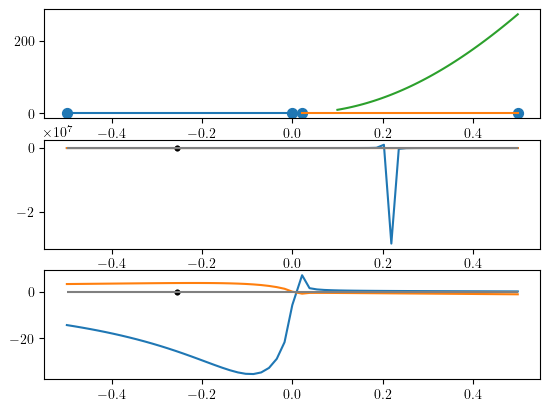

1.2647058823529411 4.970588235294118 0.2941176470588234


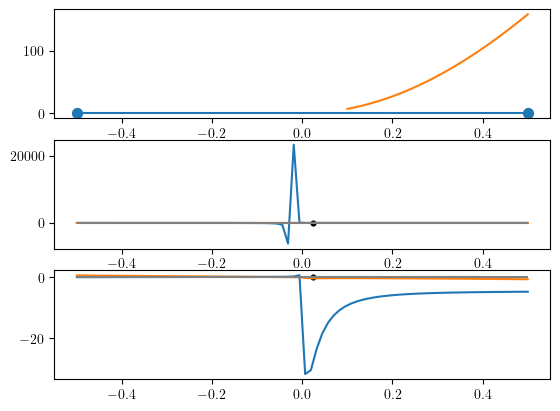

9.205882352941176 1.4411764705882353 -0.2941176470588234


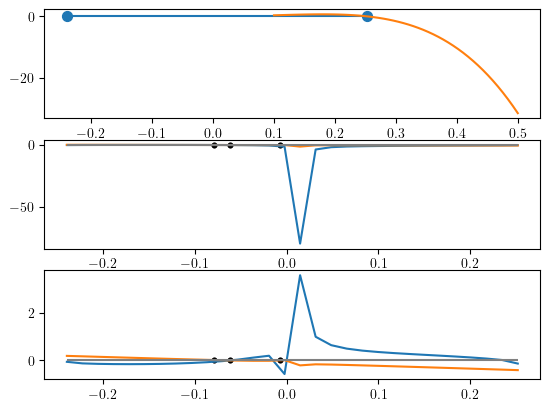

9.73529411764706 2.9117647058823533 4.7058823529411775


/tmp/ipykernel_270091/3484302180.py:67: RuntimeWarning: invalid value encountered in sqrt
  return 1/(Gamma*delta+2*k*w*x)*(w**2*x+np.sqrt(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)))


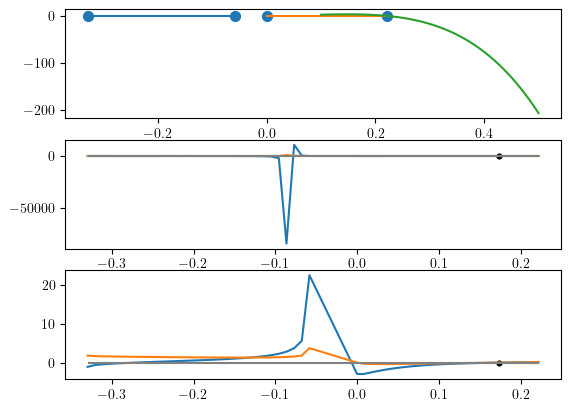

8.411764705882353 2.1764705882352944 -4.117647058823529


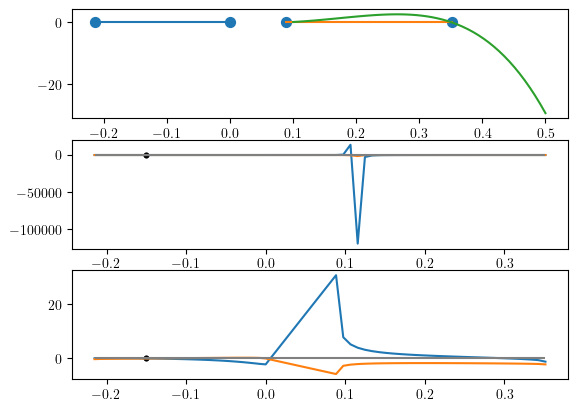

5.5 3.058823529411765 1.7647058823529411


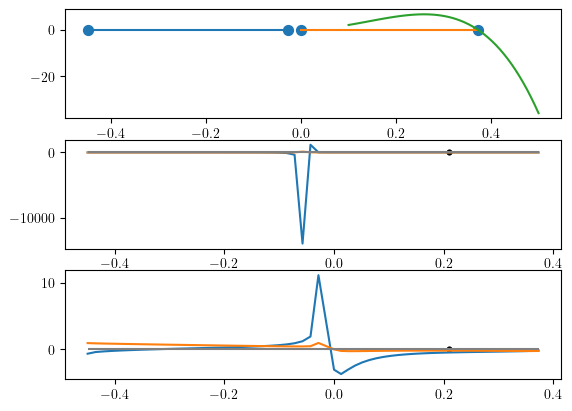

9.470588235294118 1.2941176470588236 -0.2941176470588234


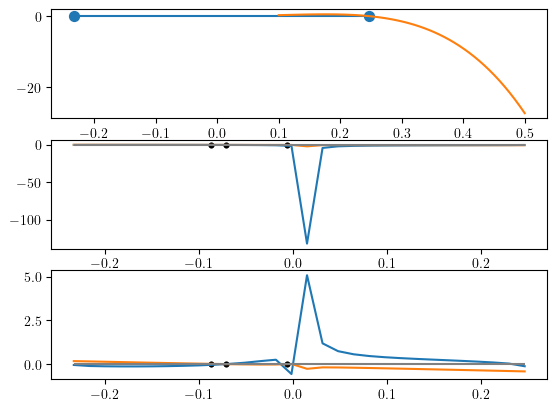

2.588235294117647 2.9117647058823533 -1.7647058823529411


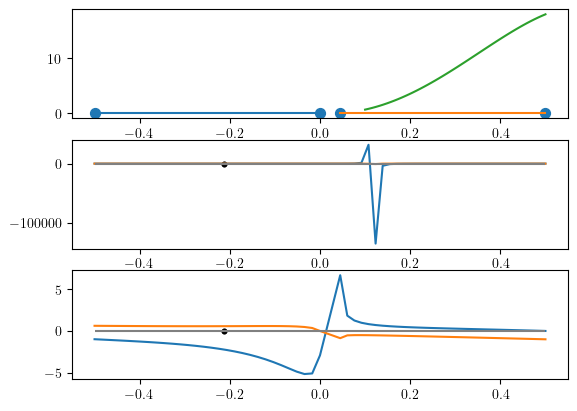

9.205882352941176 4.970588235294118 0.2941176470588234


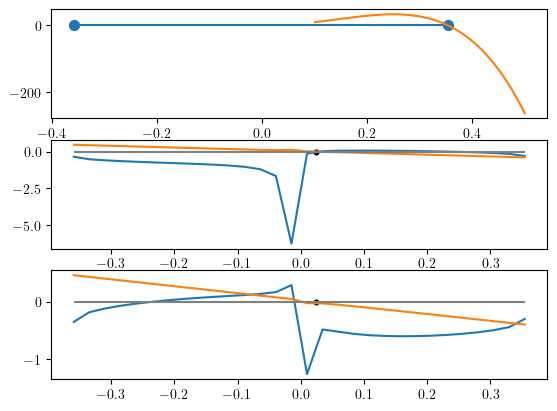

8.147058823529413 2.3235294117647056 -1.176470588235294


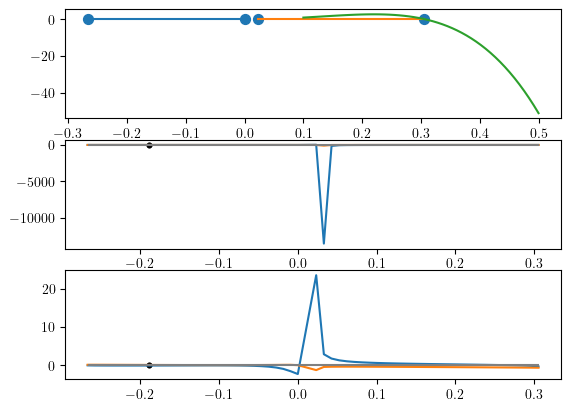

In [147]:
from random import random
for reps in range(10):
    ik, iw, id = (np.array([random(),random(),random()])*gridpoints).astype(np.int64)
    kval, wval, dval = k[ik], w[iw], d[id]
    print(kval, wval, dval)
    xgrid, points = set_xgird(wval,kval,dval,Gam,sgam,points=True)
    Func = np.zeros_like(xgrid)
    if xgrid[0]==-2:
        plt.figure()
        plt.plot(x_range,insq(x_range,wval,kval,dval,Gam,sgam))
        plt.show()
        continue
    fig, ax = plt.subplots(3,1)
    for n in range(3):
        if n==1:
            Func  = np.zeros_like(xgrid)
            for i,x in enumerate(xgrid):
                # print(insq_preci(x,wval,kval,dval,Gam,sgam))
                # if dval>=0:
                #     Func[i]=y1ofx(x,wval,kval,dval,Gam,sgam)
                # else:
                #     Func[i]=y2ofx(x,wval,kval,dval,Gam,sgam)
                Func1  = np.zeros_like(xgrid)
                Func2 = np.zeros_like(xgrid)
                Func3 = np.zeros_like(xgrid)
                if dval>=0:
                    for i,x in enumerate(xgrid):
                    # print(insq_preci(x,wval,kval,dval,Gam,sgam))
                    # Func2[i]=num(x,wval,kval,dval,Gam,sgam)
                        # y =y1ofx(x,wval,kval,dval,Gam,sgam)
                        Func1[i]=Fx(x,wval,kval,dval,Gam,sgam,2)#*Decimal(x)
                        Func2[i]=Fx2(x,wval,kval,dval,Gam,sgam,2)#*y
                    # Func3[i]=eq(x,wval,kval,dval,Gam,sgam,1)
                else:
                    for i,x in enumerate(xgrid):
                        # y = y2ofx(x,wval,kval,dval,Gam,sgam)
                        Func1[i]=Fx(x,wval,kval,dval,Gam,sgam,1)#*Decimal(x)
                        Func2[i]=Fx2(x,wval,kval,dval,Gam,sgam,1)#*y
            
        elif n==0:
            Func  = np.zeros_like(x_range)
            for i,x in enumerate(x_range):
                Func[i]=insq(x,wval,kval,dval,Gam,sgam)
        else:
            Func1  = np.zeros_like(xgrid)
            Func2 = np.zeros_like(xgrid)
            Func3 = np.zeros_like(xgrid)
            if dval>=0:
                for i,x in enumerate(xgrid):
                # print(insq_preci(x,wval,kval,dval,Gam,sgam))
                # Func2[i]=num(x,wval,kval,dval,Gam,sgam)
                    # y =y1ofx(x,wval,kval,dval,Gam,sgam)
                    Func1[i]=Fx(x,wval,kval,dval,Gam,sgam,1)#*Decimal(x)
                    Func2[i]=Fx2(x,wval,kval,dval,Gam,sgam,1)#*y
                    # Func3[i]=eq(x,wval,kval,dval,Gam,sgam,1)
            else:
                for i,x in enumerate(xgrid):
                    # y = y2ofx(x,wval,kval,dval,Gam,sgam)
                    Func1[i]=Fx(x,wval,kval,dval,Gam,sgam,2)#*Decimal(x)
                    Func2[i]=Fx2(x,wval,kval,dval,Gam,sgam,2)#*y
                    # Func3[i]=eq(x,wval,kval,dval,Gam,sgam,2)
        for j in range(len(points)):
            if j%2==0 and n==0:
                ax[n].plot(points[j:j+2],np.zeros_like(points[j:j+2]))
        if n==0:
            ax[n].scatter(points,np.zeros_like(points),s=50)    
            ax[n].plot(x_range,Func)
        elif n ==1:
            # ax[n].scatter(xgrid,Func,s=5)
            # for i in range(int(solution_number[ik,iw,id])):
            #     ax[n].scatter(xsol[ik,iw,id,i],0,s=10,color='0')
            # ax[n].plot(xgrid,Func2)
            ax[n].plot(xgrid,Func1)
            ax[n].plot(xgrid,Func2)
            for i in range(int(solution_number[ik,iw,id])):
                ax[n].scatter(xsol[ik,iw,id,i],0,s=10,color='0')
            ax[n].hlines(0,xgrid[0],xgrid[-1],color='0.5')
            
        else:
            ax[n].plot(xgrid,Func1)
            ax[n].plot(xgrid,Func2)
            for i in range(int(solution_number[ik,iw,id])):
                ax[n].scatter(xsol[ik,iw,id,i],0,s=10,color='0')
            ax[n].hlines(0,xgrid[0],xgrid[-1],color='0.5')
            # ax[n].plot(xgrid,Func3)
            # ax[n].scatter(points,np.zeros_like(points),s=50)  
        # if n==0:
        #     print(Func,wval)
    # for soli in range(sol_numb):
    #     ax[-2].scatter(xsol[ik,iw,id,soli],0,s=20,color="0")
        
    plt.show()


In [50]:

for i in range(2):
    diff = int(1-2*i)
    print(k[17+2*diff],w[17+diff],d[17])
    print(k[17],w[17+diff],d[17])
    print(k[17],w[17],d[17+diff])

5.294117647058823 2.352941176470588 4.117647058823529
5.235294117647059 2.352941176470588 4.117647058823529
5.235294117647059 2.3235294117647056 4.147058823529411
5.176470588235294 2.2941176470588234 4.117647058823529
5.235294117647059 2.2941176470588234 4.117647058823529
5.235294117647059 2.3235294117647056 4.088235294117647


[[3.02354568e-06]
 [2.81878193e-06]
 [1.44378127e-06]]


/tmp/ipykernel_270091/2633283238.py:69: RuntimeWarning: invalid value encountered in sqrt
  return 1/(Gamma*delta+2*k*w*x)*(w**2*x+np.sqrt(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)))


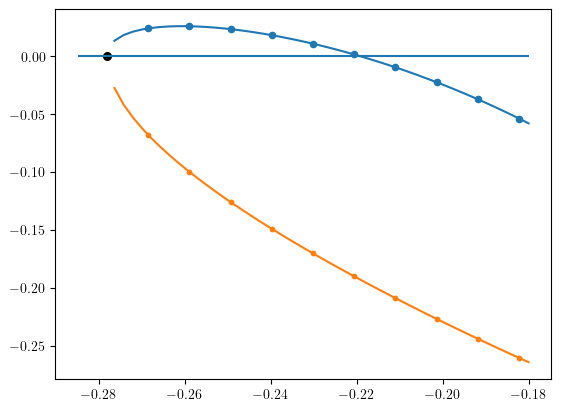

[[3.02354606e-06]
 [2.81878116e-06]
 [1.44378299e-06]]


/tmp/ipykernel_270091/2633283238.py:93: RuntimeWarning: invalid value encountered in sqrt
  return 1/(Gamma*delta+prec2*k*w*x)*(w**prec2*x-np.sqrt(w**4*x**prec2-(prec2*k*w*x+Gamma*delta)*(prec2*k*w*x**3-w*Gamma*x+Gamma*delta*x**prec2)))


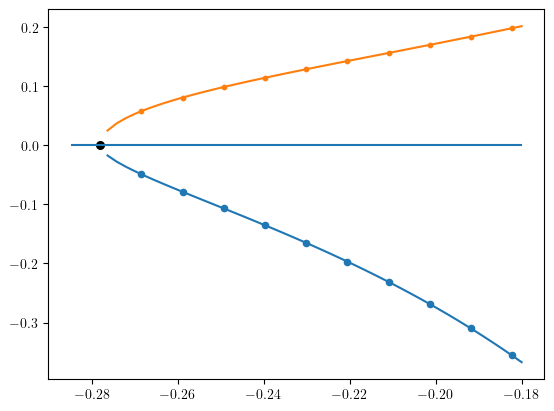

In [176]:
params = "7.529411764705882 3.1764705882352944 -4.0"
params=params.split()
params = [float(p) for p in params]
kval,wval,dval = params
if 0:#dval>=0:
    s=1
    yofx = y1ofx
else:
    s=2
    yofx = y2ofx
x_range= np.linspace(-0.285,-0.18)
xgrid, points = set_xgird(wval,kval,dval,Gam,sgam,points=True)
# print(xgrid,points)
# print(xgrid[-1]-points[-1])
newgrid = []
newpoints = []
for pi in points:
    if pi>=x_range[0] and pi<=x_range[-1]:
        newpoints.append(pi)
newpoints = np.array(newpoints)
for p in xgrid:
    if p>=x_range[0] and p<=x_range[-1]:
        newgrid.append(p)
xgrid = np.array(newgrid)
for reps in range(2):
    if reps ==0:
        s=1
        yofx = y1ofx
    else:
        s=2
        yofx = y2ofx
    plt.figure()
    sol_numb =0
    sol_list = []
    for j in range(len(xgrid)-1):
                    
        if np.any(xgrid[j+1]!=points[1::2]):
            # print(True)
            Fl = Fx(xgrid[j],wval,kval,dval,Gam,sgam,s)
            Fu = Fx(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
            if Fl*Fu<=0:
                r = root_scalar(Fx,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                if  isclose(r.root,0,abs_tol=1/10**9):
                    pass
                elif isclose(yofx(r.root,wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9):
                    if (kval>Gam+sgam and isclose(check_spec(wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9)):
                        if isclose(Fx2(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                            sol_list.append(r.root)
                            sol_numb+=1
                else:
                    if isclose(Fx2(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                        sol_list.append(r.root)
                        sol_numb+=1
            Fl = Fx2(xgrid[j],wval,kval,dval,Gam,sgam,s)
            Fu = Fx2(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
            new_sol=0
            if Fl*Fu<=0:
                r = root_scalar(Fx2,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                for sol in sol_list:
                    new_sol=1
                    if isclose(sol,r.root,abs_tol=1/10**6):
                        new_sol = 0
                        print(False)
                        break
                if new_sol:
                    print(sol_list,r.root,[r.root-po for po in sol_list])
                    if  isclose(r.root,0,abs_tol=1/10**9):
                        pass
                    elif isclose(yofx(r.root,wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9):
                        if (kval>Gam+sgam and isclose(check_spec(wval,kval,dval,Gam,sgam),0,abs_tol=1/10**9)):
                            if isclose(Fx(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                                sol_list.append(r.root)
                                sol_numb+=1
                    else:
                        if isclose(Fx(r.root,wval,kval,dval,Gam,sgam,s),0,abs_tol=1/10**9):
                            sol_list.append(r.root)
                            sol_numb+=1
    i=0
    while i<sol_numb:
        x = sol_list[i]
        y = yofx(x,wval,kval,dval,Gam,sgam)
        z = m_z(x,y,wval,kval,Gam)
        if  not ((isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[0],0,rel_tol=10e-9,abs_tol=1/10**9)) and (isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[1],0,rel_tol=10e-9,abs_tol=1/10**9)) and (isclose(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam)[2],0,rel_tol=10e-9,abs_tol=1/10**9))):
            print(gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam),Fx(x,wval,kval,dval,Gam,sgam,s),Fx2(x,wval,kval,dval,Gam,sgam,s),x,y,z)
            sol_numb-=1
            sol_list.pop(i)
        print('info: ',gl_np(0,np.array([x,y,z]),wval,kval,dval,Gam,sgam),Fx(x,wval,kval,dval,Gam,sgam,s),Fx2(x,wval,kval,dval,Gam,sgam,s),x,y,z)
    
        i+=1
    for index in range(sol_numb):
        xsol[ik,iw,id,index]= sol_list[index]
    solution_number[ik,iw,id]=sol_numb
 
    plt.plot(x_range,Fx_vec(x_range,wval,kval,dval,Gam,sgam,s))
    plt.plot(x_range,Fx2_vec(x_range,wval,kval,dval,Gam,sgam,s))
    plt.scatter(xgrid,Fx_vec(xgrid,wval,kval,dval,Gam,sgam,s),s=20)
    plt.scatter(xgrid,Fx2_vec(xgrid,wval,kval,dval,Gam,sgam,s),s=10)
    # plt.scatter(newpoints,np.zeros_like(newpoints),s=50,color='0.5')
    # plt.scatter(xgrid,np.zeros_like(xgrid),s=10,color='red')
    plt.scatter(sol_list,np.zeros_like(sol_list),s=30,color='0')
    plt.hlines(0,x_range[0],x_range[-1])
    
    
    
    while True:
        try:
            newpoints[0] -=1/10**10
            y = yofx(newpoints[0],wval,kval,dval,Gam,sgam)
            z = m_z(newpoints[0],y,wval,kval,Gam)
            # print(gl_np(0,np.array([newpoints[0],y,z]),wval,kval,dval,Gam,sgam))
            if np.isnan(y):
                
                newpoints[0]+=1/10**10
                break
            # print(y)
            
        except RuntimeWarning:
            break
    y = yofx(newpoints[0],wval,kval,dval,Gam,sgam)
    z = m_z(newpoints[0],y,wval,kval,Gam)  
    r = root(Foriginal_vec,args=(wval,kval,dval,Gam,sgam),x0=[newpoints[0],y])
    plt.scatter(r.x[0],0,s=30,color='0')
    y = r.x[1]
    z = m_z(newpoints[0],y,wval,kval,Gam) 
    print(gl_np(0,np.array([r.x[0],y,z]),wval,kval,dval,Gam,sgam))
    plt.show()

TypeError: string operation on non-string array

1.0 1.0 -5.0


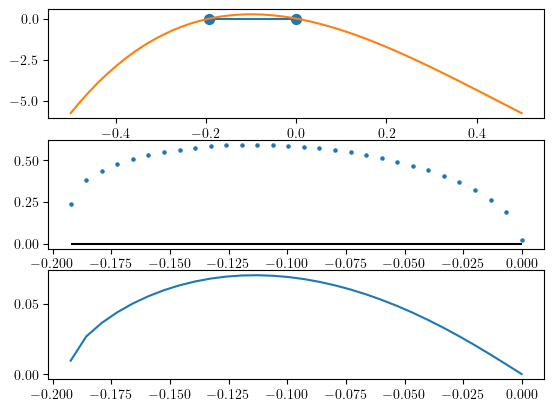

1.0 1.0 -1.6666666666666665


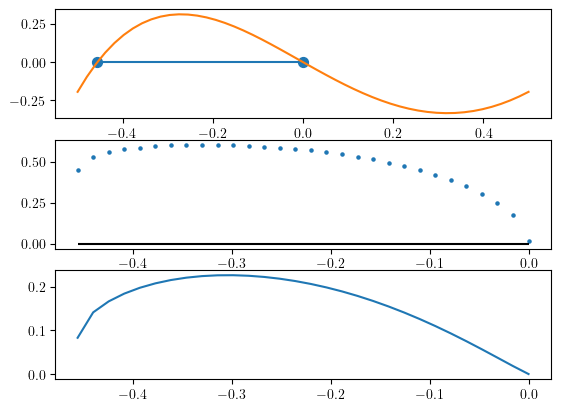

1.0 1.0 1.666666666666667


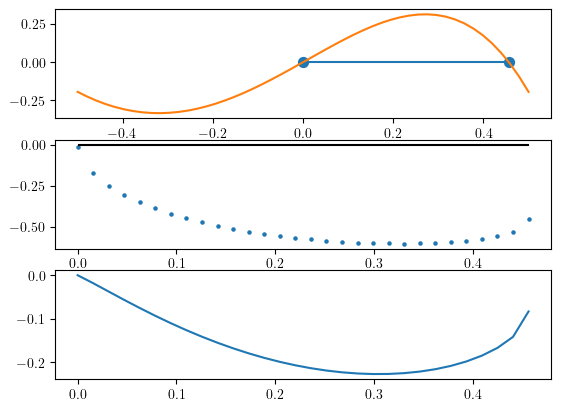

1.0 1.0 5.0


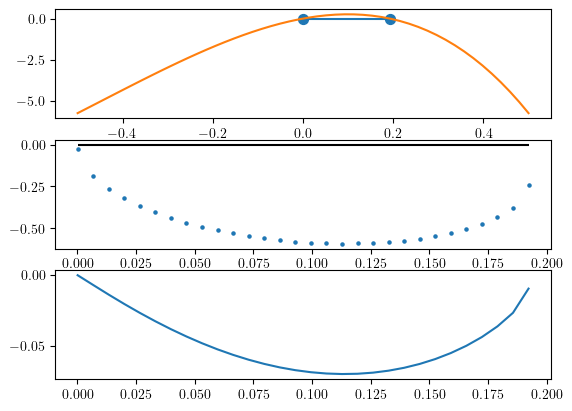

1.0 2.666666666666667 -5.0


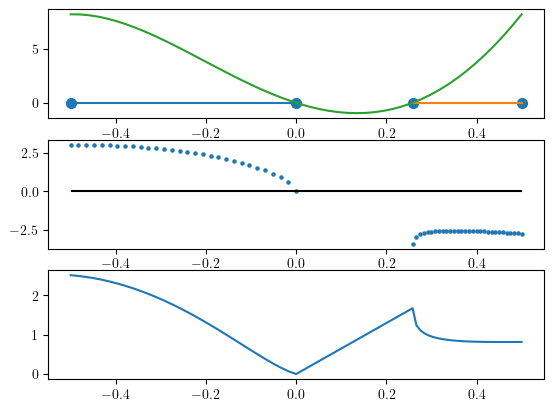

1.0 2.666666666666667 -1.6666666666666665


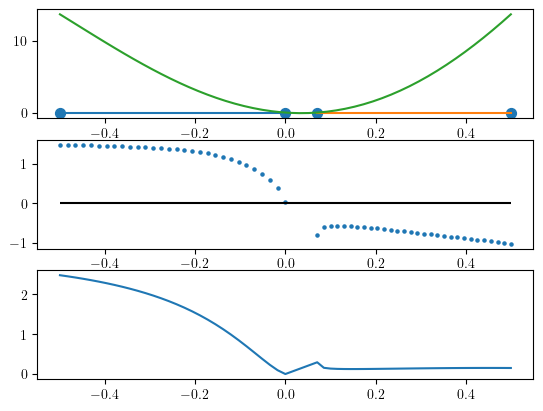

1.0 2.666666666666667 1.666666666666667


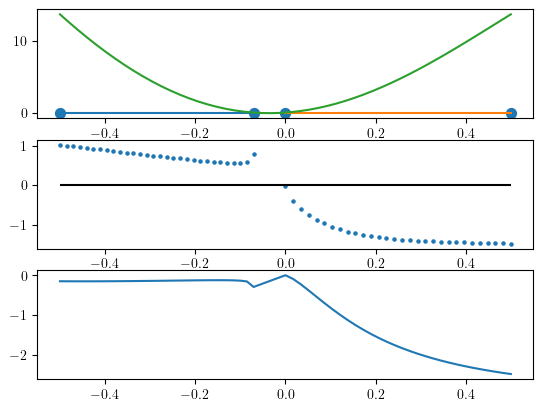

1.0 2.666666666666667 5.0


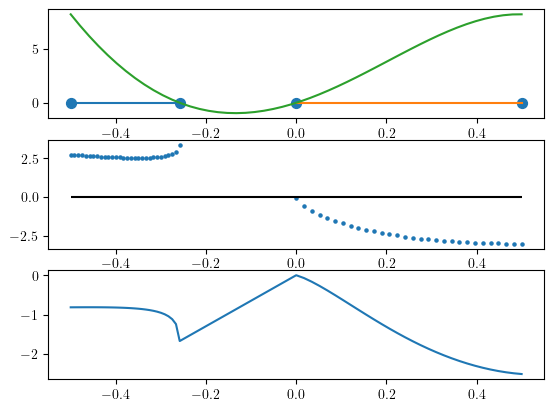

1.0 4.333333333333334 -5.0


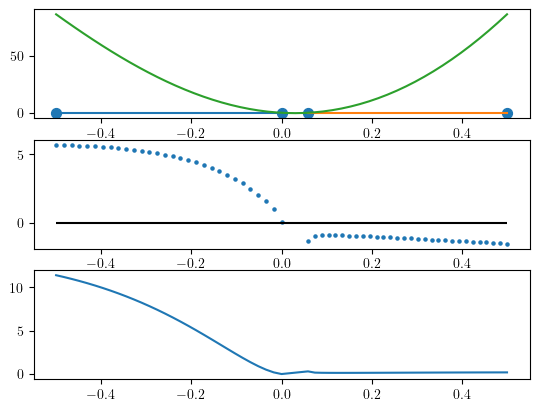

1.0 4.333333333333334 -1.6666666666666665


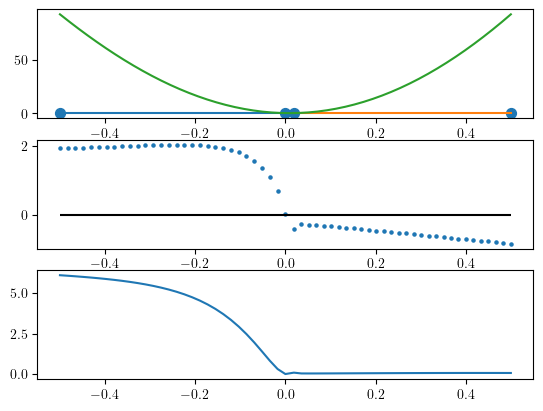

1.0 4.333333333333334 1.666666666666667


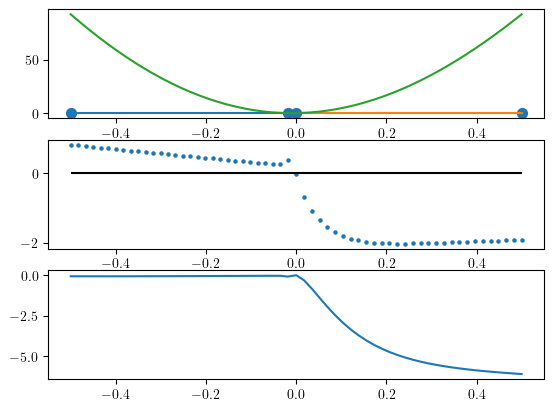

1.0 4.333333333333334 5.0


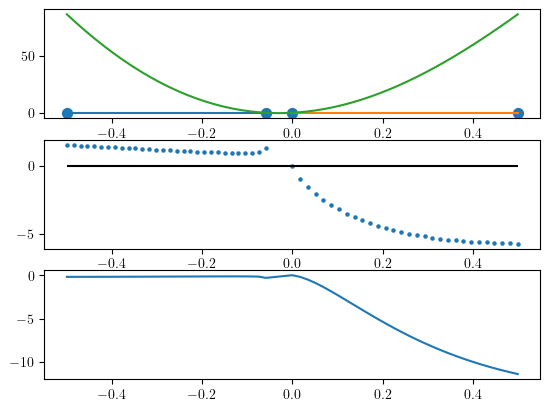

1.0 6.0 -5.0


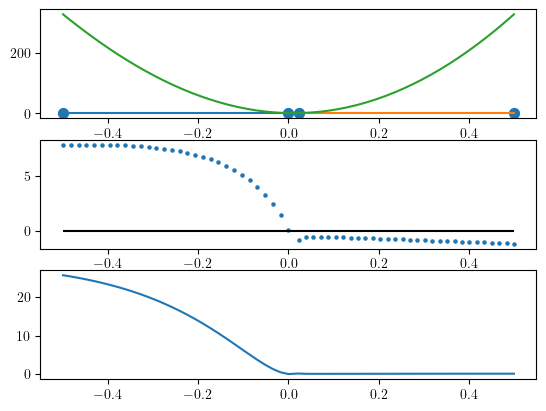

1.0 6.0 -1.6666666666666665


InvalidOperation: [<class 'decimal.InvalidOperation'>]

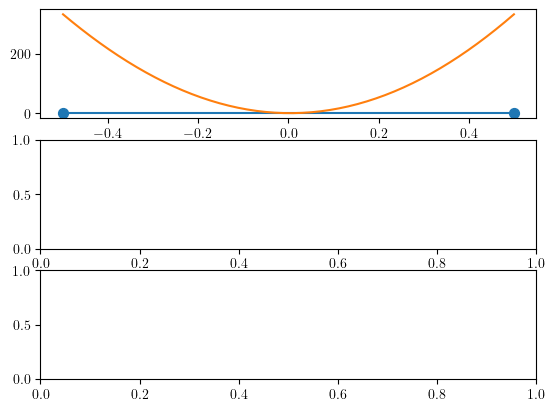

In [140]:
Gam = 1
sgam = 0.2
s =1
s =1
x_range = np.linspace(-0.5,0.5)
gridpoints = 4
k= np.linspace(1,10,gridpoints)
w = np.linspace(1,6,gridpoints)
d = np.linspace(-5,5,gridpoints)
xsol = np.ones((gridpoints,gridpoints,gridpoints,30))
# xgrid = np.linspace(-0.5-1/10**5,0.5+1/10**5,40)
solution_number = np.zeros((gridpoints,gridpoints,gridpoints))
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            # kval, wval,dval =1.0, 2+2/3, 1+2/3
            sol_numb = 0
            xgrid, points = set_xgird(wval,kval,dval,Gam,sgam,points=True)
            Func = np.zeros_like(xgrid)
            if xgrid[0]==-2:
                plt.figure()
                plt.plot(x_range,insq(x_range,wval,kval,dval,Gam,sgam))
                plt.show()
                continue
            # for j in range(len(xgrid)-1):
                
                # Fl = Fx(xgrid[j],wval,kval,dval,Gam,sgam,s)
                # Fu = Fx(xgrid[j+1],wval,kval,dval,Gam,sgam,s)
                # if Fl*Fu<=0:
                #     r = root_scalar(Fx,args=(wval,kval,dval,Gam,sgam,s),method='bisect',bracket=(xgrid[j],xgrid[j+1]))
                #     xsol[ik,iw,id,sol_numb] = r.root
                #     sol_numb+=1
            solution_number[ik,iw,id]=sol_numb
            # if sol_numb==0:
            print(kval,wval,dval)
            # print(-Gam*dval/(2*kval*wval))
            # print(xgrid)
            fig, ax = plt.subplots(3,1)
            for n in range(3):
                if n==1:
                    Func  = np.zeros_like(xgrid)
                    for i,x in enumerate(xgrid):
                        # print(insq_preci(x,wval,kval,dval,Gam,sgam))
                        if dval>=0:
                            Func[i]=Fx2(x,wval,kval,dval,Gam,sgam,1)
                        else:
                            Func[i]=Fx2(x,wval,kval,dval,Gam,sgam,2)
                elif n==0:
                    Func  = np.zeros_like(x_range)
                    for i,x in enumerate(x_range):
                        Func[i]=insq(x,wval,kval,dval,Gam,sgam)
                else:
                    Func1  = np.zeros_like(xgrid)
                    Func2 = np.zeros_like(xgrid)
                    Func3 = np.zeros_like(xgrid)
                    if dval>=0:
                        for i,x in enumerate(xgrid):
                        # print(insq_preci(x,wval,kval,dval,Gam,sgam))
                        # Func2[i]=num(x,wval,kval,dval,Gam,sgam)
                            y =y1ofx(x,wval,kval,dval,Gam,sgam)
                            Func1[i]=Fx(x,wval,kval,dval,Gam,sgam,1)*Decimal(x)
                            Func2[i]=Fx2(x,wval,kval,dval,Gam,sgam,1)*y
                            Func3[i]=eq(x,wval,kval,dval,Gam,sgam,1)
                    else:
                        for i,x in enumerate(xgrid):
                            y = y2ofx(x,wval,kval,dval,Gam,sgam)
                            Func1[i]=Fx(x,wval,kval,dval,Gam,sgam,2)*Decimal(x)
                            Func2[i]=Fx2(x,wval,kval,dval,Gam,sgam,2)*y
                            Func3[i]=eq(x,wval,kval,dval,Gam,sgam,2)
                for j in range(len(points)):
                    if j%2==0 and n==0:
                        ax[n].plot(points[j:j+2],np.zeros_like(points[j:j+2]))
                if n==0:
                    ax[n].scatter(points,np.zeros_like(points),s=50)    
                    ax[n].plot(x_range,Func)
                elif n ==1:
                    ax[n].scatter(xgrid,Func,s=5)
                    # ax[n].plot(xgrid,Func2)
                    ax[n].hlines(0,xgrid[0],xgrid[-1],color='0')
                else:
                    ax[n].plot(xgrid,Func1)
                    # ax[n].plot(xgrid,Func3)
                    # ax[n].scatter(points,np.zeros_like(points),s=50)  
                # if n==0:
                #     print(Func,wval)
            # for soli in range(sol_numb):
            #     ax[-2].scatter(xsol[ik,iw,id,soli],0,s=20,color="0")
                
            plt.show()
            # break
        # break
    # break
            

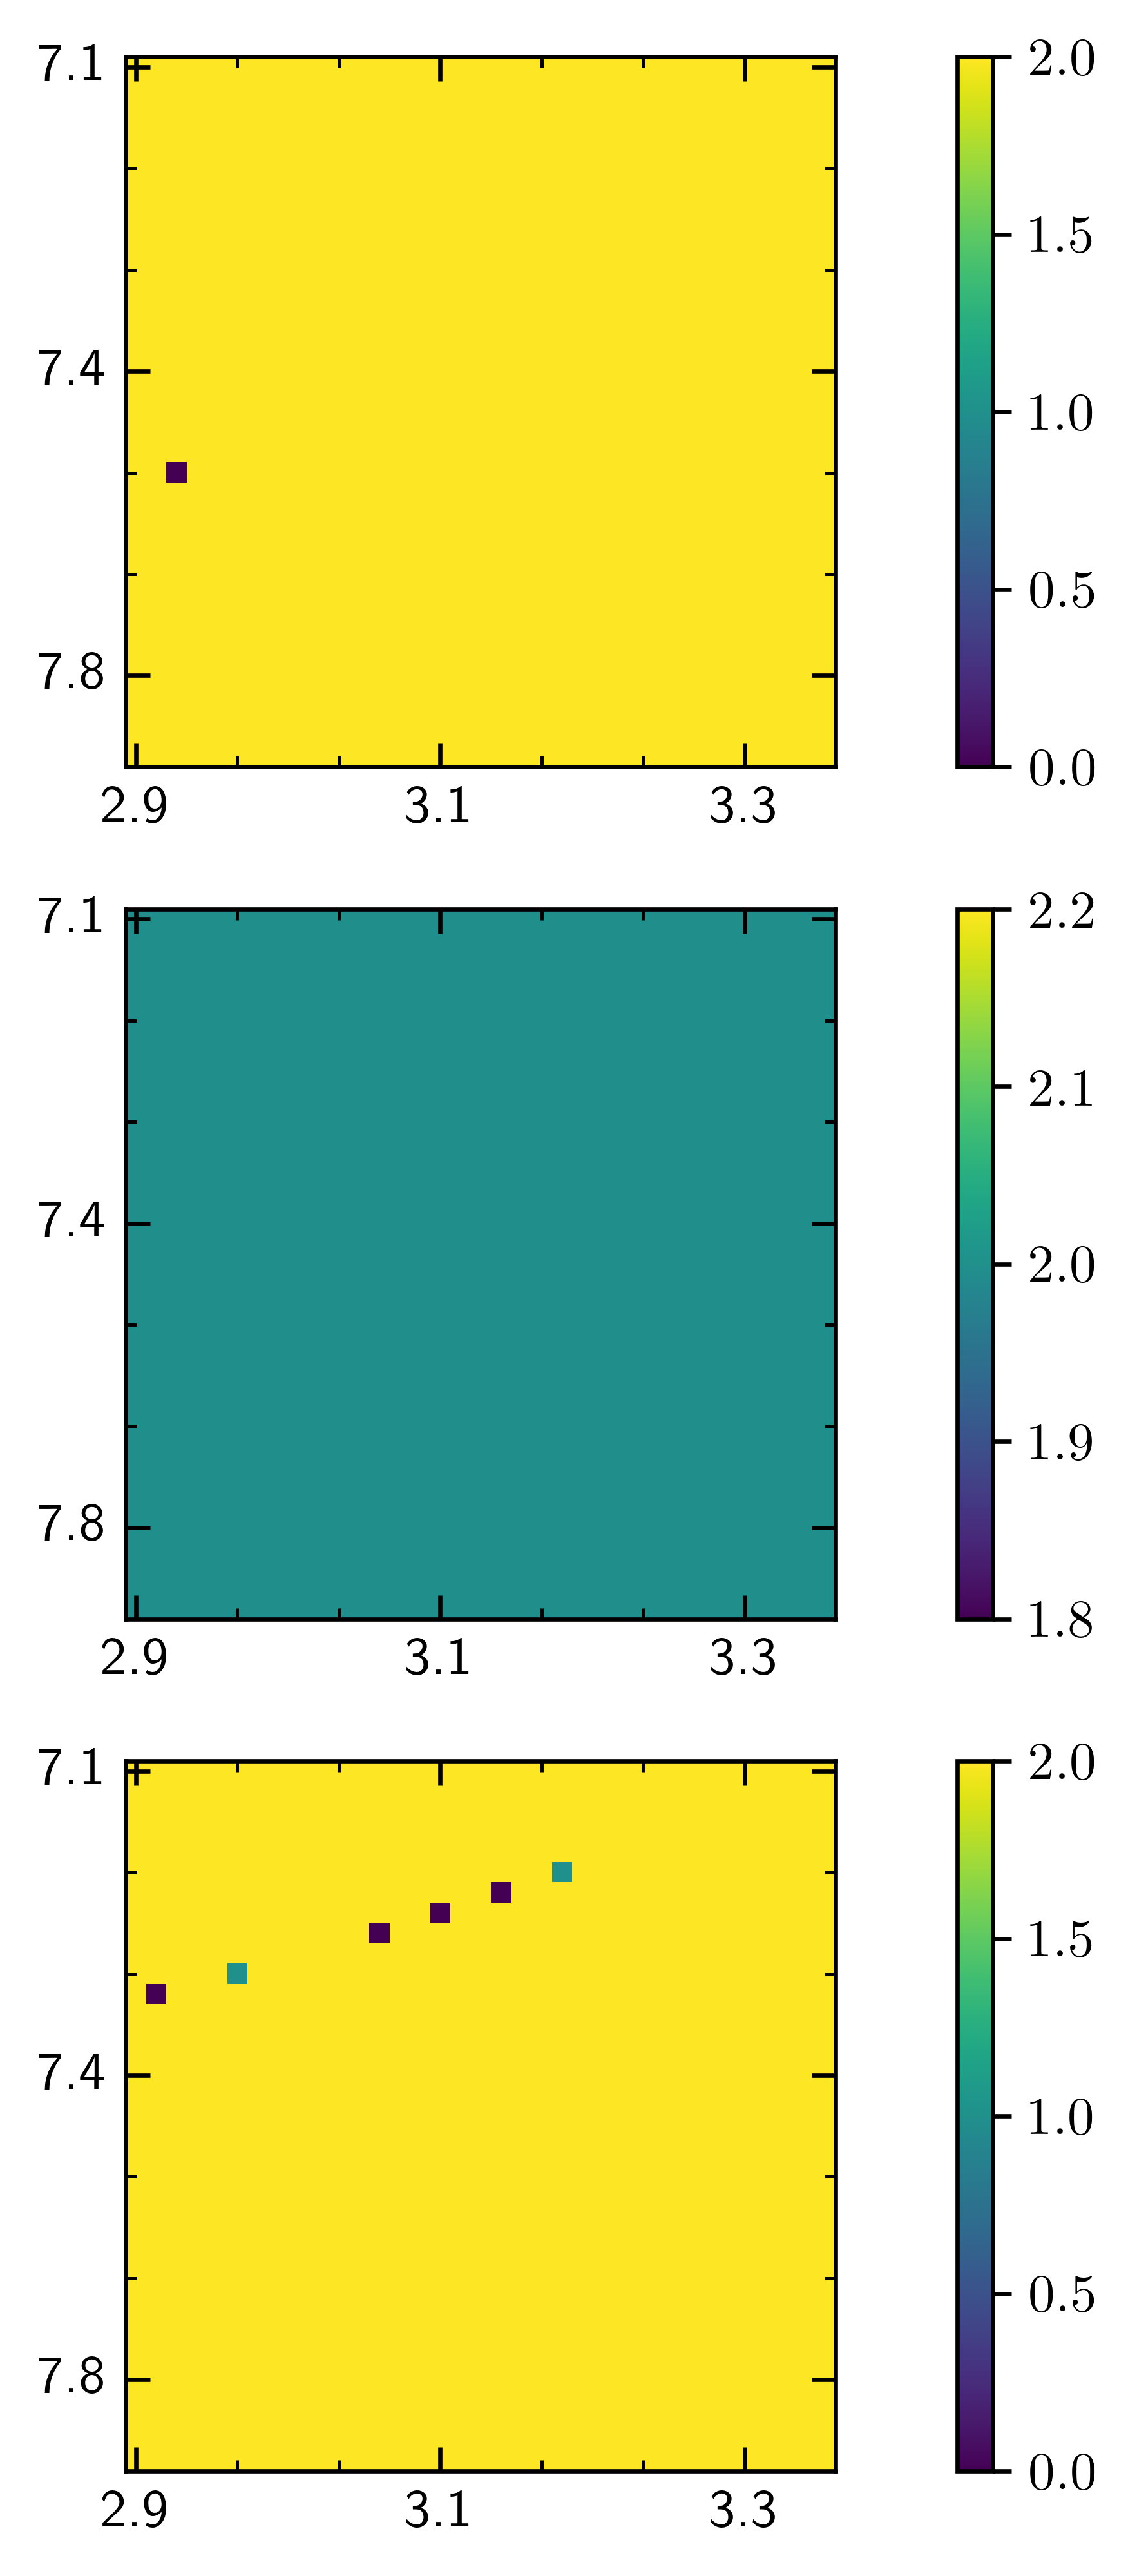

7.529411764705882 3.0294117647058822 -3.5
7.529411764705882 3.058823529411765 -3.5882352941176467
7.529411764705882 3.088235294117647 -3.676470588235294
7.529411764705882 3.1764705882352944 -4.0

7.529411764705882 3.0 -3.411764705882353
7.529411764705882 3.1470588235294117 -3.8823529411764706


In [154]:
tickformat = Format(xscale=w,yscale=k,xprec="{:.1f}",yprec="{:.1f}")
tickp = TickProperties(SZX=True,SZY=True,\
                       xtick_step_major=15,\
                        xtick_step_minor=5,\
                            ytick_step_major=15,\
                                ytick_step_minor=5)
setup = Setup_Fig(name_of_plot='lam2_anal_ml.png',tickp=tickp,formater=tickformat)
setup.fig_width= 20.6*cm
setup.fig_height=20.6*cm #29.1*cm
setup.DEFAULT_HEAT_EXTEND = (-0.5,64.5,39.5,-0.5)
fig, ax = setup.return_fig(shape=(3,1),dots_per_inch=600)
mask1 = np.ones_like(solution_number[1,:,:])*np.nan
mask2 = np.ones_like(solution_number[1,:,:])*np.nan
mask1[17,17]=2
mask2[9,31]=2
plots = [solution_number[:,:,33],solution_number[:,30,:],solution_number[14,:,:]]
for i in range(3):
    im = ax[i].imshow(plots[i])#,extent=(-0.5,64.5,39.5,-0.5))
    # if i==0:
    # am = ax[i].imshow(mask1)
    # elif i==2:
    #     am =ax[i].imshow(mask2)
    cbar = fig.colorbar(im,ax=ax[i],orientation='vertical')
plt.show()
for i in range(k.shape[0]):
    for j in range(w.shape[0]):
        if solution_number[14,i,j]==0:
            print(k[14],w[i],d[j])
print('')
for i in range(k.shape[0]):
    for j in range(w.shape[0]):
        if solution_number[14,i,j]==1:
            print(k[14],w[i],d[j])
# print(w[9])
# for i in range(k.shape[0]):
#     for j in range(w.shape[0]):
#         for l in range(d.shape[0]):
#             # if solution_number[i,9,j]==0:
#             if isclose(k[i],5.235294117647059,rel_tol=1e-4,abs_tol=1/10**4) and isclose(w[j],2.3235294117647056,rel_tol=1e-4,abs_tol=1/10**4) and isclose(d[l],4.117647058823529,rel_tol=1e-4,abs_tol=1/10**4):
#                 print(k[i],w[9],d[j],i,j,l)




/tmp/ipykernel_270091/3484302180.py:91: RuntimeWarning: invalid value encountered in sqrt
  return 1/(Gamma*delta+prec2*k*w*x)*(w**prec2*x-np.sqrt(w**4*x**prec2-(prec2*k*w*x+Gamma*delta)*(prec2*k*w*x**3-w*Gamma*x+Gamma*delta*x**prec2)))


7.61764705882353 3.3529411764705883 -3.5294117647058822


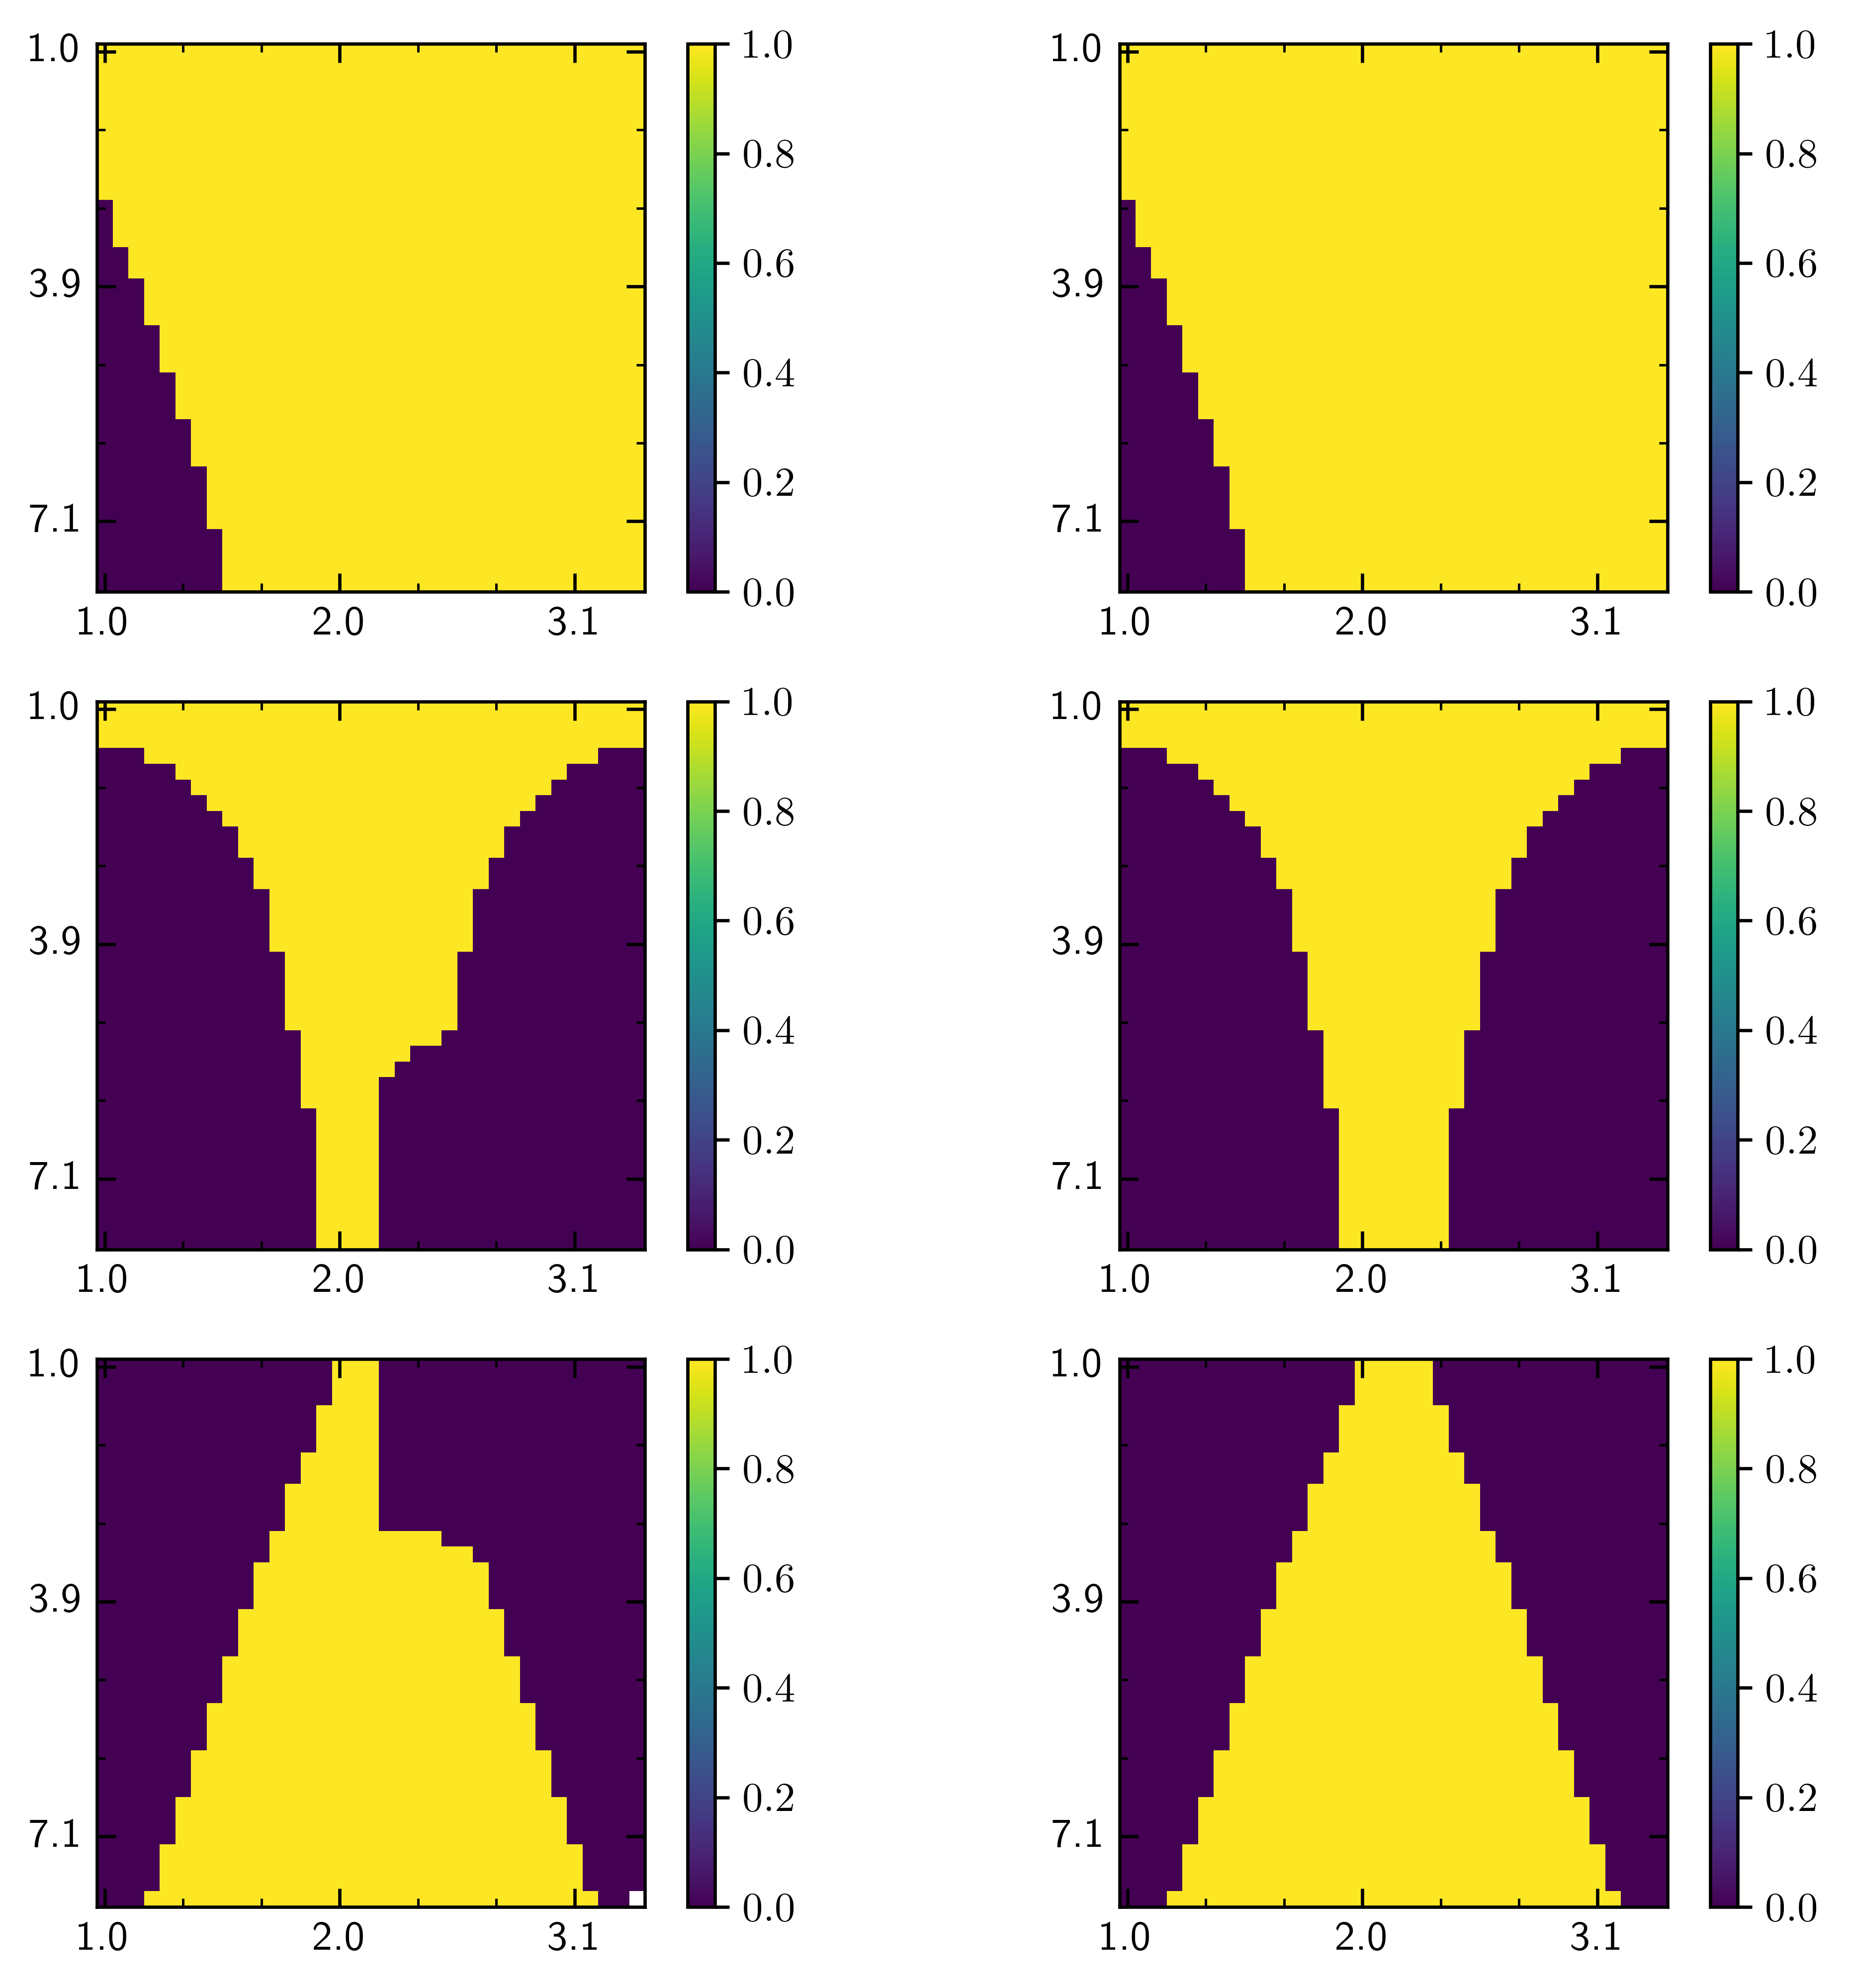

In [ ]:
stability = np.ones_like(xsol)
stability_plus = np.zeros_like(solution_number)
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            for ind in range(int(solution_number[ik,iw,id])):
                s = yvariant[ik,iw,id,ind]
                if s==1:
                    yofx = y1ofx
                else:
                    yofx = y2ofx
                y = yofx(xsol[ik,iw,id,ind],wval,kval,dval,Gam,sgam)
                z = m_z(xsol[ik,iw,id,ind],y,wval,kval,Gam)
                m = np.array([xsol[ik,iw,id,ind],y,z])
                # print(m)
                jac = jac_gl_np(0,m,wval,kval,dval,Gam,sgam)
                try:
                    eigenvalues, vectors =np.linalg.eig(jac)
                except:
                    # print(ik,iw,id)
                    stability[ik,iw,id,ind]=-1
                    stability_plus[ik,iw,id]=-1
                if np.any(eigenvalues>=0):
                    # print(eigenvalues)
                    stability[ik,iw,id,ind]=0
                else:
                    stability_plus[ik,iw,id]=1

            stability[ik,iw,id,int(solution_number[ik,iw,id]):]=np.nan

fig, ax = setup.return_fig(shape=(3,2),dots_per_inch=600)
mask1 = np.ones_like(solution_number[1,:,:])*np.nan
mask2 = np.ones_like(solution_number[1,:,:])*np.nan
mask1[4,13]=2
mask2[9,31]=2
kat, wat, dat = 34,4,12
# plots = [stability[:,:,dat,0],stability[:,wat,:,0],stability[kat,:,:,0]]
plots = [[stability[:,:,dat,0],stability[:,wat,:,0],stability[kat,:,:,0]],[stability_plus[:,:,dat],stability_plus[:,wat,:],stability_plus[kat,:,:]]]
for i in range(3):
    for j in range(2):
        im = ax[i,j].imshow(plots[j][i])#,extent=(-0.5,64.5,39.5,-0.5))
        # if i==0:
        am = ax[i].imshow(mask1)
        # elif i==2:
        #     am =ax[i].imshow(mask2)
        cbar = fig.colorbar(im,ax=ax[i,j],orientation='vertical')

for i in range(k.shape[0]):
    for j in range(w.shape[0]):
        # for l in range(d.shape[0]):
            # if solution_number[i,9,j]==0:
            # if isclose(k[i],5.235294117647059,rel_tol=1e-4,abs_tol=1/10**4) and isclose(w[j],2.3235294117647056,rel_tol=1e-4,abs_tol=1/10**4) and isclose(d[l],4.117647058823529,rel_tol=1e-4,abs_tol=1/10**4):
                # print(k[i],w[9],d[j],i,j,l)
        # if np.isnan(stability[i,25,j,0]):
        #     print(k[i],w[25],d[j])
        if solution_number[i,j,33]==0 and i>12:
            print(k[i],w[j],d[5])
            


In [ ]:
from sympy.abc import gamma, G, kappa, omega, delta, x, y, z, t
from sympy.matrices import Matrix
from sympy import lambdify, simplify, expand
import numpy as np
m = Matrix([x,y,z])
glx = -delta/2*m[1]-(gamma+G)/2*m[0]+kappa*m[0]*m[2]
gly = delta/2*m[0]-omega*m[2]-(gamma+G)/2*m[1]+kappa*m[1]*m[2]
glz = omega*m[1]-kappa*(m[0]**2+m[1]**2)+G/2-G*m[2]
gl = Matrix([glx,gly,glz])
jac_gl = gl.jacobian([m[0],m[1],m[2]])
gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],gl)
jac_gl_np = lambdify([t,m,omega,kappa,delta,G,gamma],jac_gl)
# gl_np(0,[0,2,1],1,1/2,0.2,1), jac_gl_np(0,[0,2,1],1,1/2,0.2,1)
from scipy.integrate import solve_ivp
mz= 1/2 - 1/G*(kappa*(m[0]**2+m[1]**2)-omega*m[1])
jac_gl = simplify(expand(jac_gl.subs(z,mz)))
jac_gl

Matrix([
[(G*(-G - gamma + kappa)/2 - kappa**2*x**2 - kappa**2*y**2 + kappa*omega*y)/G,                                                                     -delta/2,         kappa*x],
[                                                                     delta/2, (G*(-G - gamma + kappa)/2 - kappa**2*x**2 - kappa**2*y**2 + kappa*omega*y)/G, kappa*y - omega],
[                                                                  -2*kappa*x,                                                           -2*kappa*y + omega,              -G]])

In [57]:
sol_index = []
for ik, kval in enumerate(k):
    for iw, wval in enumerate(w):
        for id, dval in enumerate(d):
            if solution_number[ik,iw,id]>0:
                sol_index.append([ik,iw,id,int(solution_number[ik,iw,id])])

/tmp/ipykernel_270091/3484302180.py:67: RuntimeWarning: invalid value encountered in sqrt
  return 1/(Gamma*delta+2*k*w*x)*(w**2*x+np.sqrt(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)))


[ 0.25  0.1  -0.4 ]
8.411764705882353 2.0294117647058822 3.8235294117647065
[[ 0.37885222]
 [-0.72389297]
 [-0.25161901]]
[ 0.06587719 -0.13330316  0.29511179]


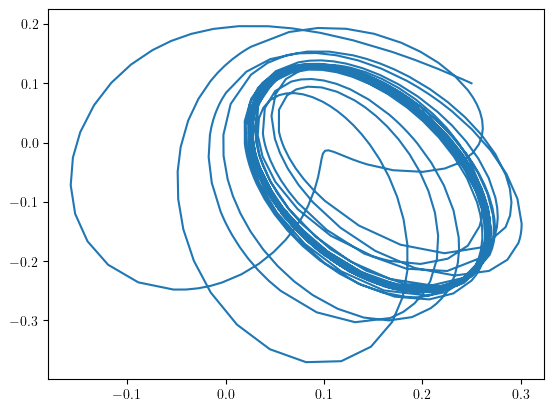

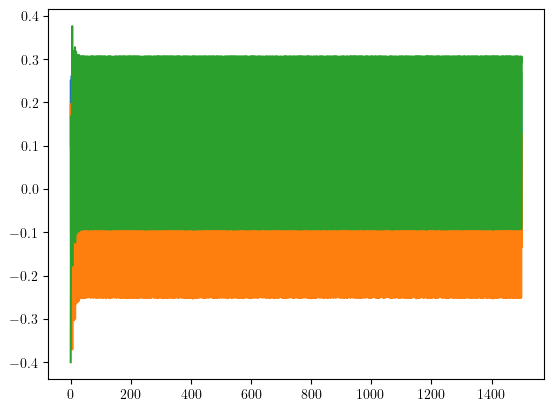

In [143]:
jk, jw,jd = 28,7,30
kval, wval, dval = k[jk], w[jw], d[jd]

# params = "3.3823529411764706 1.1470588235294117 2.3529411764705888"
# params = "5.235294117647059 2.3235294117647056 4.117647058823529"
# params=params.split()
# params = [float(p) for p in params]
# kval,wval,dval = params
if dval>=0:
    s=1
    yofx = y1ofx
else:
    s=2
    yofx = y2ofx
plt.figure()
sol = 0.25
y = yofx(sol,wval,kval,dval,Gam,sgam)
z= m_z(sol,y,wval,kval,Gam)
plt.scatter(sol,y,s=50)
# mstart = np.array([sol,y,z])
mstart = np.array([sol,0.1,-0.4])
print(mstart)
print(kval,wval,dval)
# print(gl_np(0,mstart,wval,kval,dval,Gam,sgam))
arguments = wval,kval, dval, Gam, sgam
traj = solve_ivp(gl_np,(0,1500),mstart,'LSODA',args=arguments)
mend = np.array([traj.y[0][-1],traj.y[1][-1],traj.y[2][-1]])
print(gl_np(0,mend,wval,kval,dval,Gam,sgam))
print(mend)
plt.plot(traj.y[0],traj.y[1])
plt.show()
plt.figure()
plt.plot(traj.t,traj.y[0])
plt.plot(traj.t,traj.y[1])
plt.plot(traj.t,traj.y[2])
plt.show()


expected fixed point
[[-5.55111512e-17]
 [ 3.46944695e-18]
 [ 5.55111512e-17]]
[-0.26929542 -0.03836757  0.11544613]


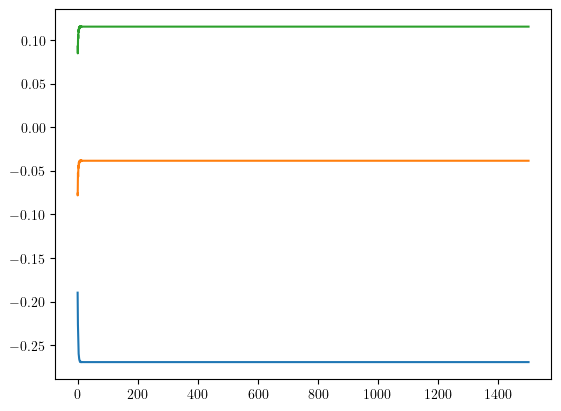

expected limit cycle


/tmp/ipykernel_270091/3484302180.py:67: RuntimeWarning: invalid value encountered in sqrt
  return 1/(Gamma*delta+2*k*w*x)*(w**2*x+np.sqrt(w**4*x**2-(2*k*w*x+Gamma*delta)*(2*k*w*x**3-w*Gamma*x+Gamma*delta*x**2)))


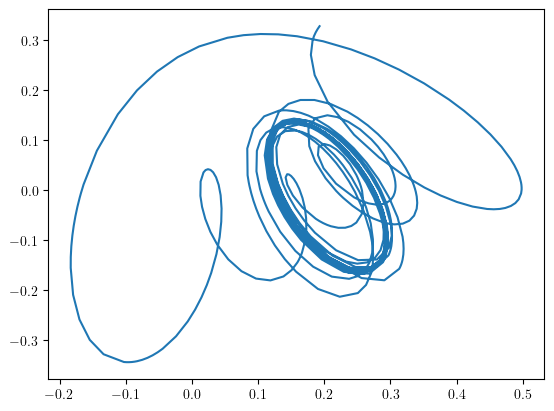

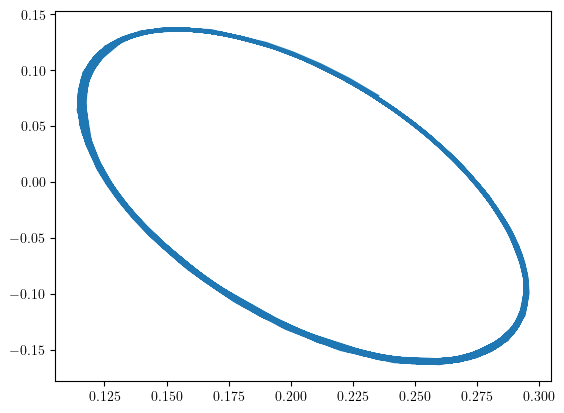

expected limit cycle


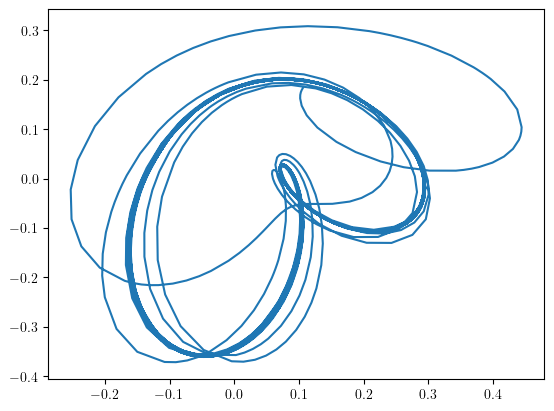

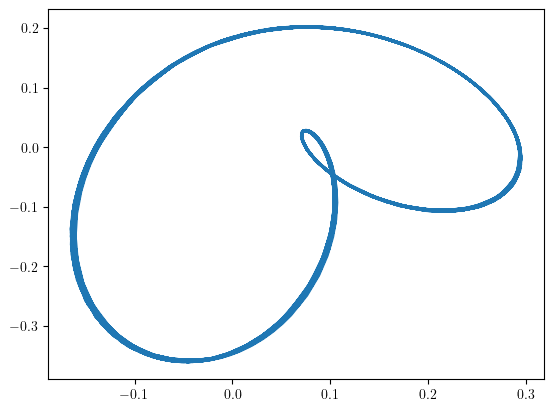

expected fixed point
[[-7.70217223e-16]
 [ 2.77555756e-17]
 [ 5.55111512e-17]]
[-0.09813686 -0.07747417  0.01952192]


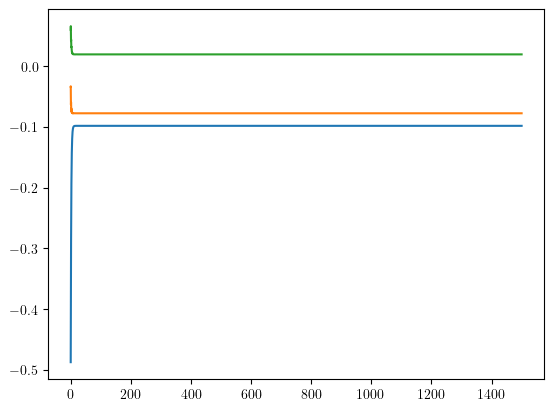

expected limit cycle


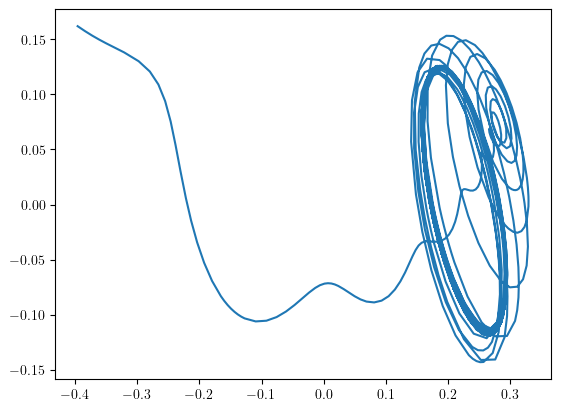

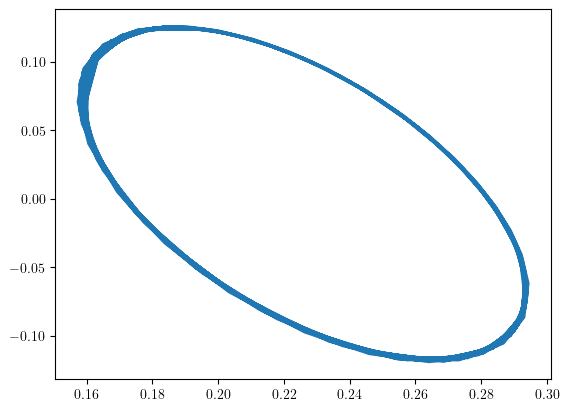

expected fixed point
[[ 0.00000000e+00]
 [ 1.09287579e-16]
 [-9.71445147e-17]]
[-0.31154152  0.01657278  0.18596615]


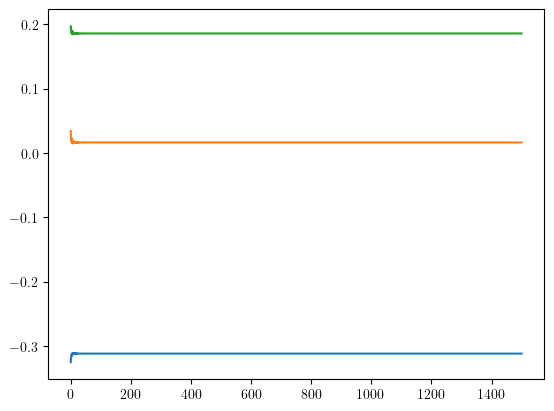

expected fixed point
[[ 2.77555756e-17]
 [-1.73472348e-17]
 [ 4.16333634e-17]]
[ 0.2637852  -0.02710001  0.10748763]


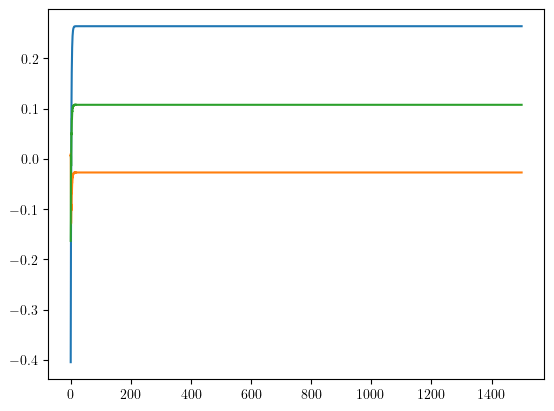

expected fixed point
[[-4.16333634e-16]
 [ 1.24900090e-16]
 [ 1.11022302e-16]]
[-0.09807891 -0.13259511  0.03510598]


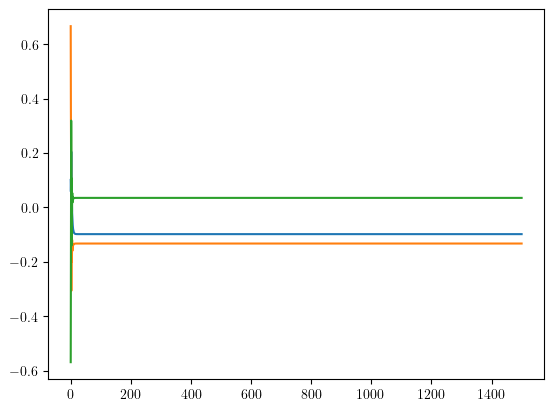

expected fixed point
[[ 1.38777878e-17]
 [ 0.00000000e+00]
 [-5.55111512e-17]]
[ 0.08731277 -0.08283953  0.0180335 ]


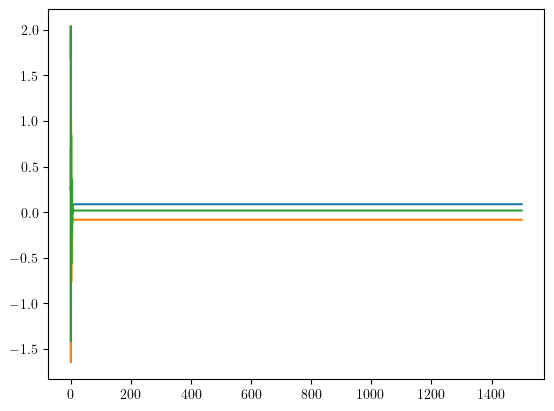

expected fixed point
[[8.11523071e-12]
 [8.54701726e-12]
 [4.17528512e-12]]
[ 0.23386009 -0.0684575   0.08606764]


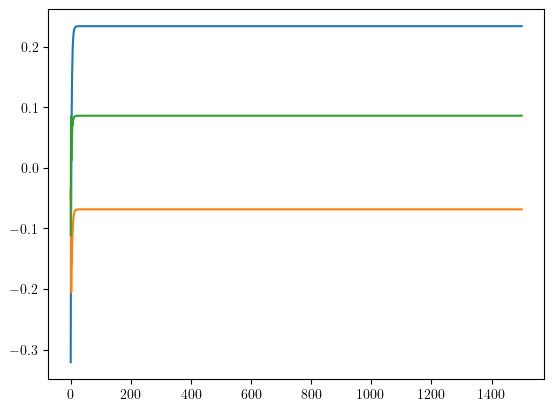

In [146]:
from random import random
for reps in range(10):
    ik, iw, id = (np.array([random(),random(),random()])*gridpoints).astype(np.int64)
    kval, wval, dval = k[ik], w[iw], d[id]
    xgrid = set_xgird(wval,kval,dval,Gam,sgam)
    x = xgrid[int(random()*xgrid.shape[0])]
    y = y1ofx(x,wval,kval,dval,Gam,sgam)
    z = m_z(x,y,wval,kval,Gam)
    mstart = np.array([x,y,z])
    # print(mstart)
    # print(kval,wval,dval)
    # print(gl_np(0,mstart,wval,kval,dval,Gam,sgam))
    
    arguments = wval,kval, dval, Gam, sgam
    traj = solve_ivp(gl_np,(0,1500),mstart,'LSODA',args=arguments)
    mend = np.array([traj.y[0][-1],traj.y[1][-1],traj.y[2][-1]])
    # print(gl_np(0,mend,wval,kval,dval,Gam,sgam))
    # print(mend)
    if stability_plus[ik,iw,id]==0:
        print('expected limit cycle')
        plt.figure()
        plt.plot(traj.y[0],traj.y[1])
        plt.show()
        plt.figure()
        plt.plot(traj.y[0][600:],traj.y[1][600:])
        plt.show()
    elif stability_plus[ik,iw,id]==1:
        print('expected fixed point')
        mend = np.array([traj.y[0][-1],traj.y[1][-1],traj.y[2][-1]])
        print(gl_np(0,mend,wval,kval,dval,Gam,sgam))
        print(mend)
        plt.figure()
        plt.plot(traj.t,traj.y[0])
        plt.plot(traj.t,traj.y[1])
        plt.plot(traj.t,traj.y[2])
        plt.show()
    else:
        print('error')
        